# EDA on the application data of Home Credit Default Risk dataset.

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Defining some custom functions required for EDA.

In [2]:
def null_percent(df):
    '''Finds columnwise percentage of null values.'''
    cols=0
    null_cols=dict()
    for i in df.columns:
        perc = df[i].isnull().sum()/len(df)
        if perc>0:
            null_cols[i]=perc*100
            cols+=1
    print("Total Columns : ",len(df.columns))
    print("Number of columns with null values : ",cols)
#     print(null_cols)
    return pd.Series(null_cols).sort_values(ascending=False)

In [3]:
def plot_categorical(df,feature_name):
    '''
    Plots categorical features on basis of number of unique values present.
    It has also been used to plot numerical features with discrete values.
    '''
    percentage_defaulter_per_category = (df[feature_name][df.TARGET == 1].value_counts() * 100 / df[feature_name].value_counts()).dropna().sort_values(ascending = False)
    percentage_non_defaulter_per_category = (df[feature_name][df.TARGET == 0].value_counts() * 100 / df[feature_name].value_counts()).dropna().sort_values(ascending = False)
    plot_values=df[feature_name].dropna().value_counts().sort_values(ascending=False)
    if len(plot_values)<5:
        fig,ax=plt.subplots(figsize=(16,4))
        fig.suptitle(f'Feature Name : {feature_name}')
        ax.set_title('Total Distribution')
        ax.pie(plot_values,labels=plot_values.index,autopct=lambda p: '{:.0f}'.format(p * plot_values.sum() / 100))
        fig,(ax3,ax4)=plt.subplots(1,2,figsize=(16,4))
        ax3.title.set_text('Defaulter Distribution')
        ax3.pie(percentage_defaulter_per_category,labels=percentage_defaulter_per_category.index,autopct=lambda p: '{:.0f}%'.format(p * percentage_defaulter_per_category.sum() / 100))
        ax4.title.set_text('Non-Defaulter Distribution')
        ax4.pie(percentage_non_defaulter_per_category,labels=percentage_non_defaulter_per_category.index,autopct=lambda p: '{:.0f}%'.format(p * percentage_non_defaulter_per_category.sum() / 100))
        plt.show()
    else:
        fig,ax=plt.subplots(figsize=(16,4))
        fig.suptitle(f'Feature Name : {feature_name}')
        ax.set_title('Total Distribution')
        total=sns.barplot(x=plot_values.index,y=plot_values,ax=ax)
        total.set_xticklabels(labels=plot_values.index,rotation=90)
        fig,(ax3,ax4)=plt.subplots(1,2,figsize=(16,4))
        ax3.title.set_text('Defaulter Distribution')
        defaulter=sns.barplot(x=percentage_defaulter_per_category.index,y=percentage_defaulter_per_category,ax=ax3)
        defaulter.set_xticks(range(len(percentage_defaulter_per_category)),rotation=90)
        ax4.title.set_text('Non-Defaulter Distribution')
        non_defaulter=sns.barplot(x=percentage_non_defaulter_per_category.index,y=percentage_non_defaulter_per_category,ax=ax4)
        non_defaulter.set_xticks(range(len(percentage_non_defaulter_per_category)),rotation=90)
        plt.show()
    print('\n')
    print('Number of null values : ',df[feature_name].isnull().sum())
    print('----------------------------------------------------')
    

In [4]:
def find_outliers_IQR(df,feature_name):
    '''
    Function to find the IQR(Inter Quartile Range).
    '''
    outlier_df=df[feature_name]
    q1=outlier_df.quantile(0.25)
    q3=outlier_df.quantile(0.75)
    iqr=q3-q1
    limits=[q1-1.5*iqr,q3+1.5*iqr]
    return limits

In [5]:
def plot_numerical(df,feature_name,plot='Distplot',limits=None):
    '''
    Function to plot continuous numerical features.
    For all features, box plots and one of CDF and Distribution Plots have been plotted.
    '''
    
    print(f'Number of null values in {feature_name} : ',df[feature_name].isnull().sum())
    print(f'Number of unique values in {feature_name} : ',df[feature_name].nunique())
    if limits !=None:
        df=df[(df[feature_name]>limits[0]) & (df[feature_name]<limits[1])]
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
    plt.suptitle(f'Feature Name : {feature_name}')
    df_defaulter=df[df['TARGET']==1][feature_name].dropna()
    df_NonDefaulter=df[df['TARGET']==0][feature_name].dropna()
    
    print('Stats')
    print(pd.concat([df_defaulter.describe().rename('Defaulter'),df_NonDefaulter.describe().rename('Non_Defaulter')],axis=1)
         .round(2))
    
    if plot=='CDF':
        
        df_defaulter=df_defaulter.sort_values()
        percentiles = [percentile/(len(df_defaulter)-1) for percentile in range(len(df_defaulter))] 
        ax1.plot(df_defaulter,percentiles,label='Defaulters')

        df_NonDefaulter=df_NonDefaulter.sort_values()
        percentiles = [percentile/(len(df_NonDefaulter)-1) for percentile in range(len(df_NonDefaulter))] 
        ax1.plot(df_NonDefaulter,percentiles,label='Non-Defaulters') 
        
    elif plot=='Distplot':
        
        sns.distplot(df_NonDefaulter,label='Non-Defaulters', hist = False, color='yellow',ax=ax1)
        
        sns.distplot(df_defaulter,label='Defaulters', hist = False, color='blue',ax=ax1)

    sns.boxplot(x='TARGET', y=feature_name, data=df,ax=ax2)
    
    ax1.set_title(f'{plot} of {feature_name}')
    ax2.set_title(f'Box Plot of {feature_name}')
    ax1.legend(loc='upper right',fontsize='medium')
    plt.show()

## Reading the data file and checking the basic stats.

In [6]:
application_train=pd.read_csv('application_train.csv')
application_train.shape

(307511, 122)

In [7]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [8]:
application_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [9]:
application_train.describe(include='O')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

## Checking null values.

Total Columns :  122
Number of columns with null values :  67


<AxesSubplot:>

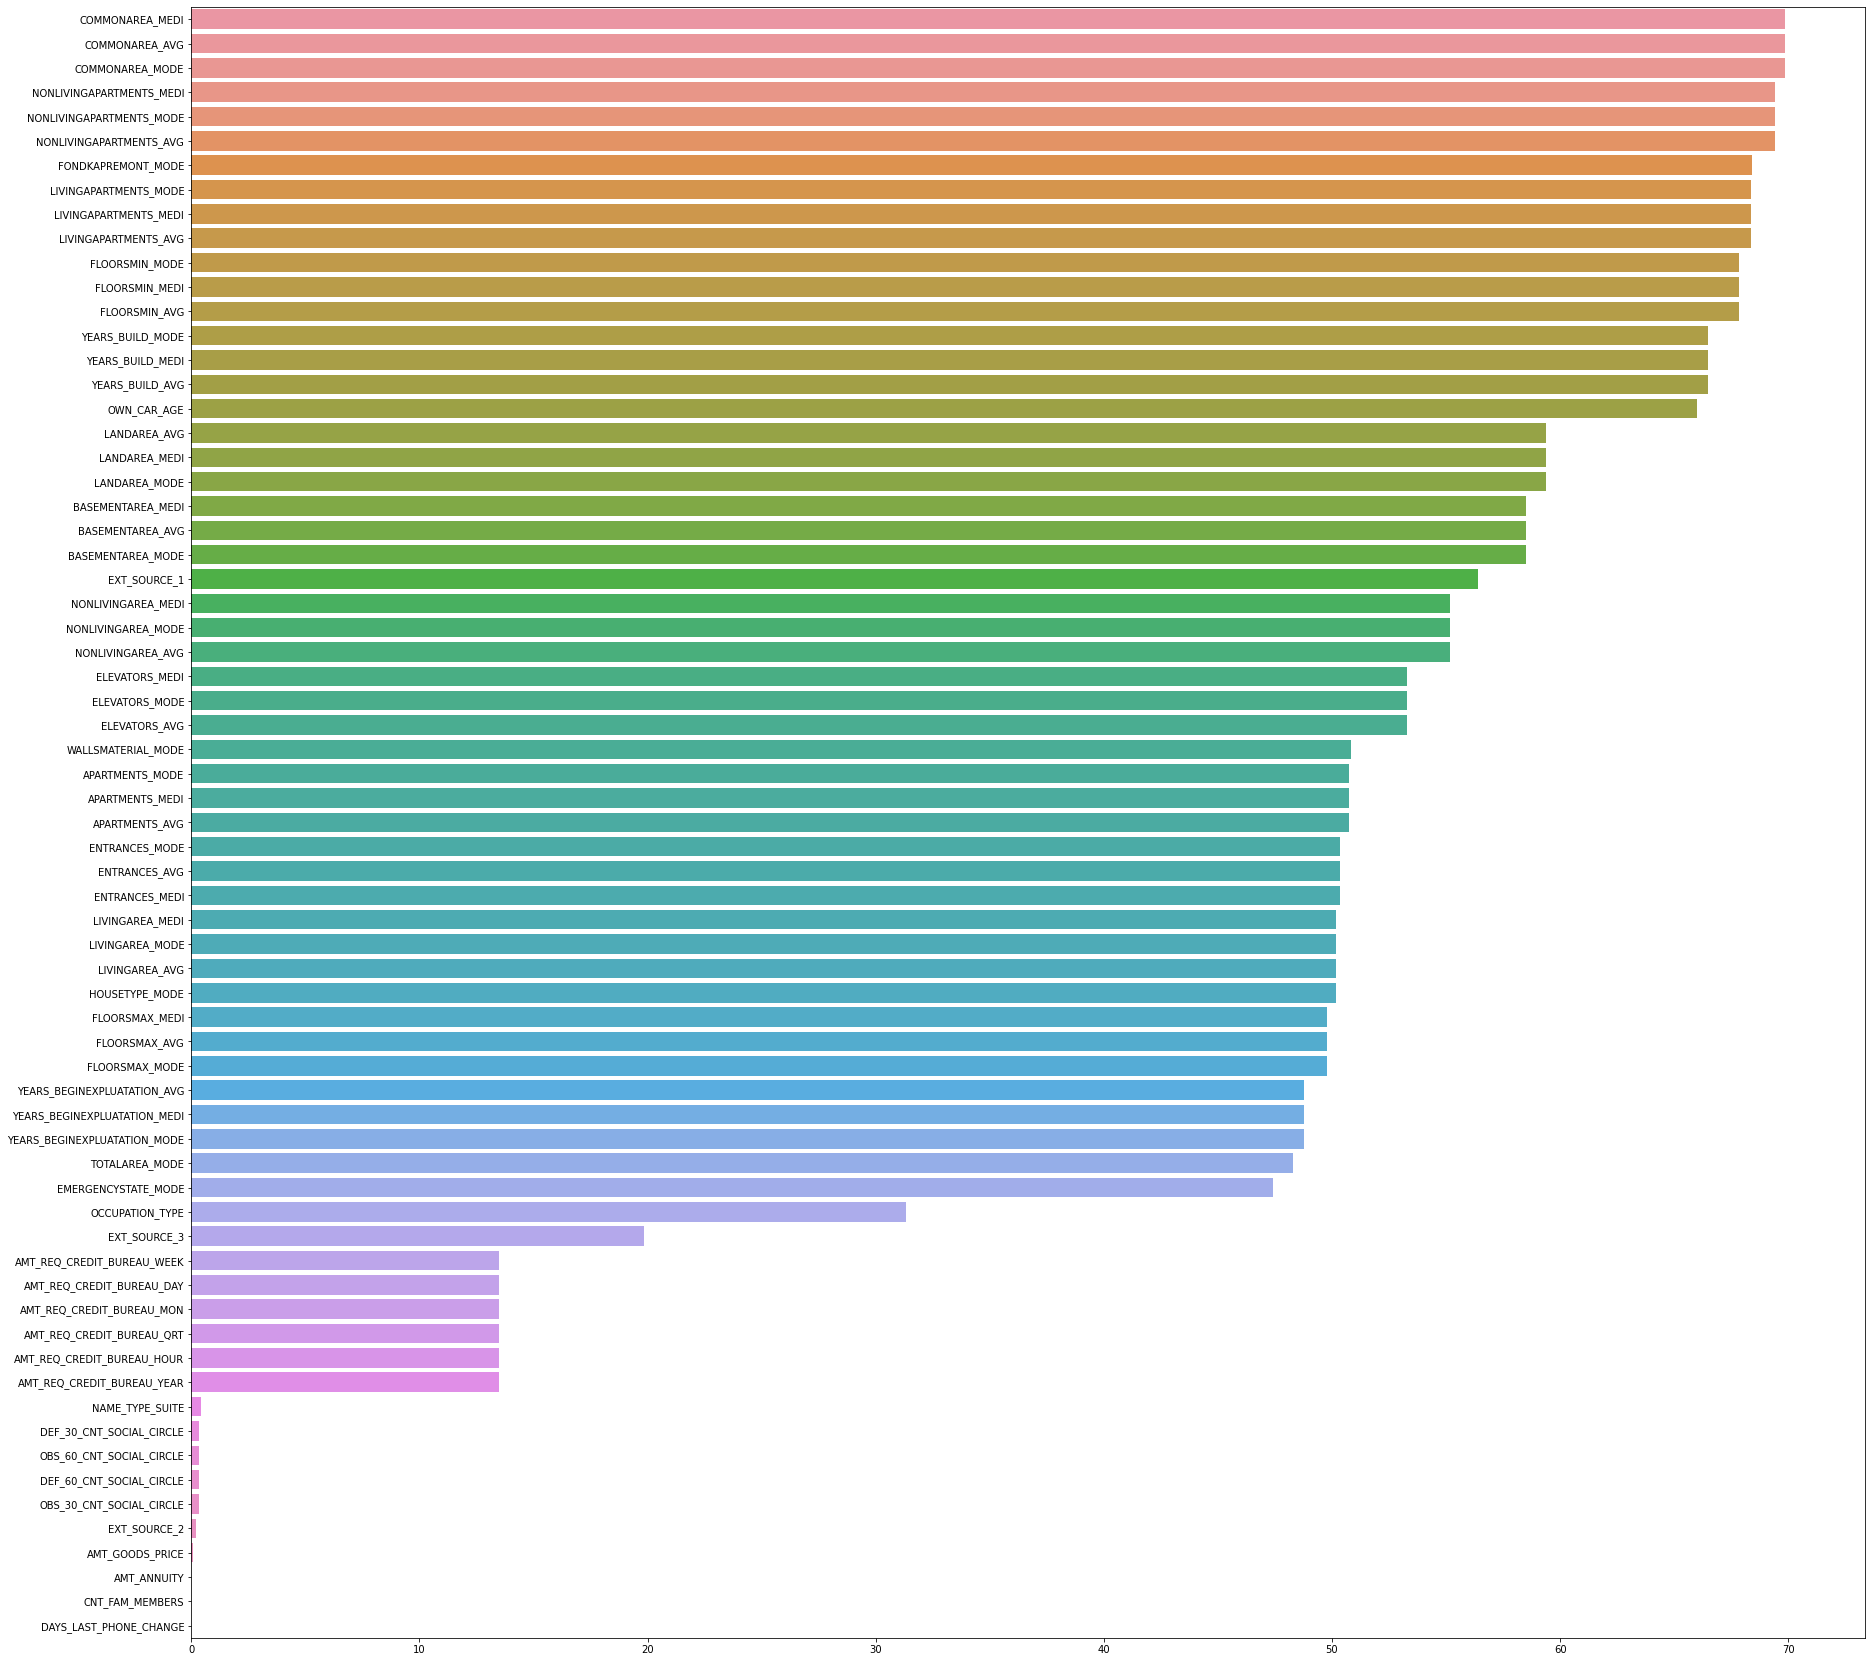

In [10]:
null_cols_train=null_percent(application_train)
plt.figure(figsize=(30,30))
sns.barplot(y=null_cols_train.index,x=null_cols_train.values,orient='h')

## Dividing columns into numerical and categorical. 

In [11]:
cat_cols = application_train.select_dtypes(include ='O').columns
num_cols = application_train.select_dtypes(exclude ='O').columns

In [12]:
cat_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

## Plotting categorical columns.

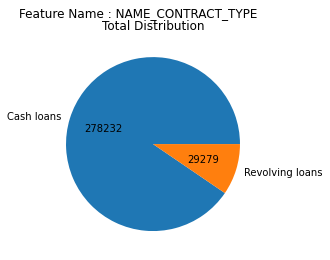

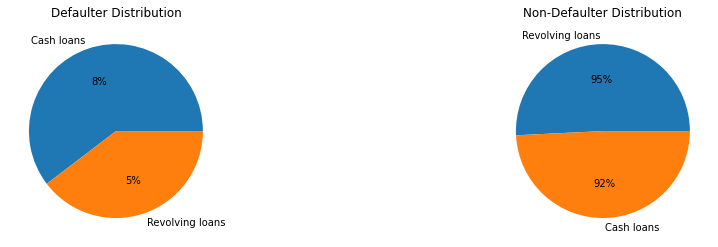



Number of null values :  0
----------------------------------------------------


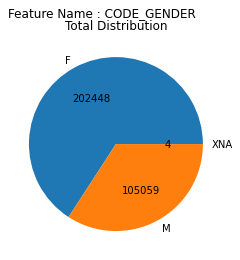

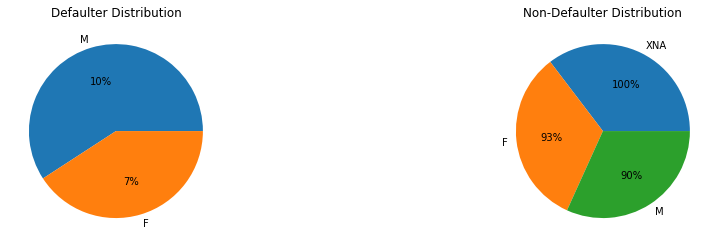



Number of null values :  0
----------------------------------------------------


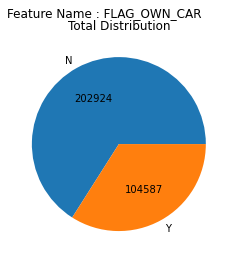

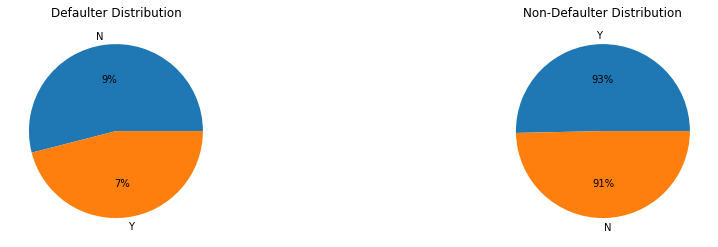



Number of null values :  0
----------------------------------------------------


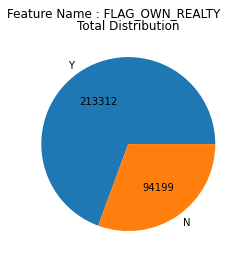

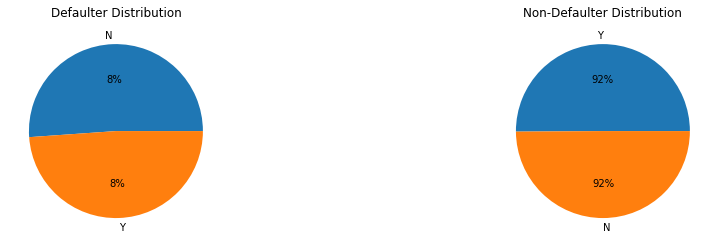



Number of null values :  0
----------------------------------------------------


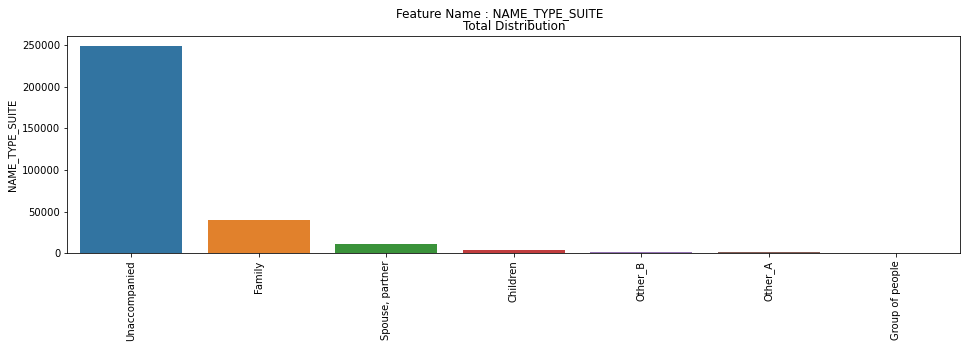

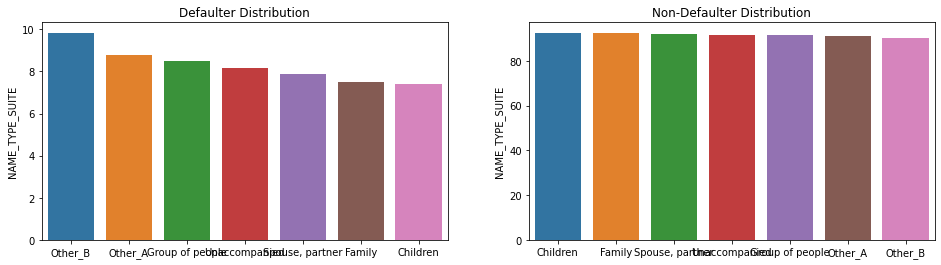



Number of null values :  1292
----------------------------------------------------


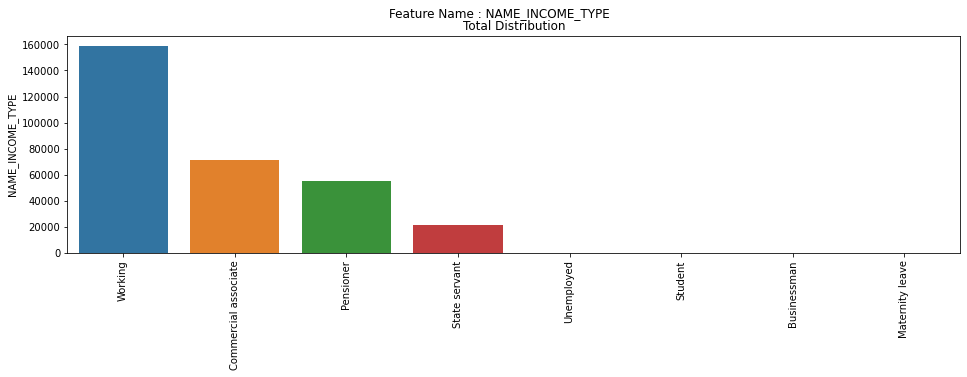

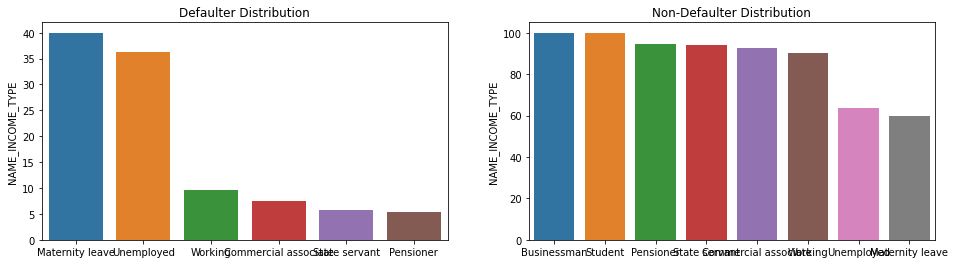



Number of null values :  0
----------------------------------------------------


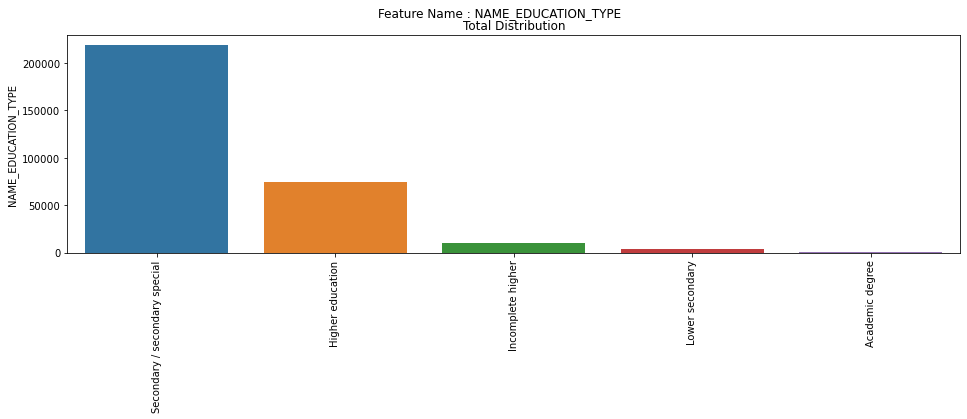

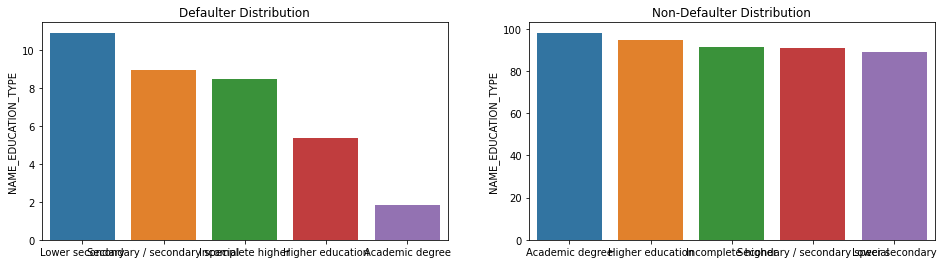



Number of null values :  0
----------------------------------------------------


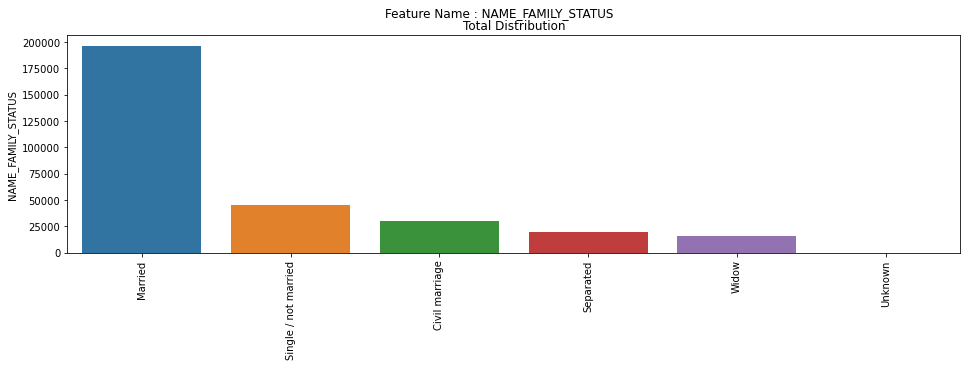

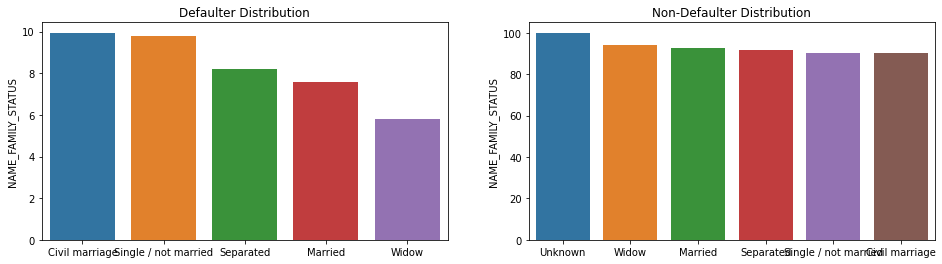



Number of null values :  0
----------------------------------------------------


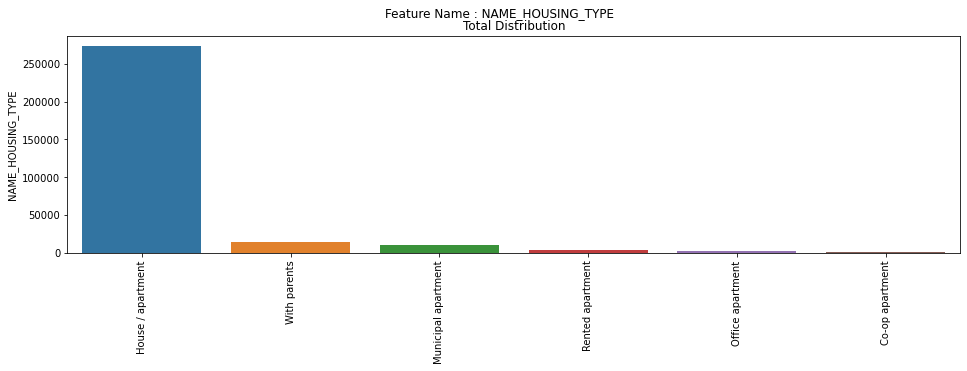

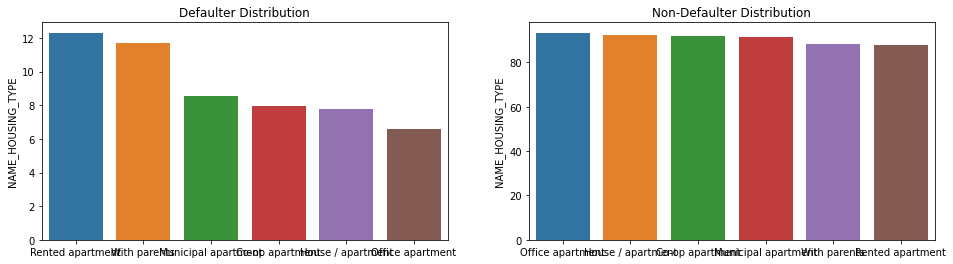



Number of null values :  0
----------------------------------------------------


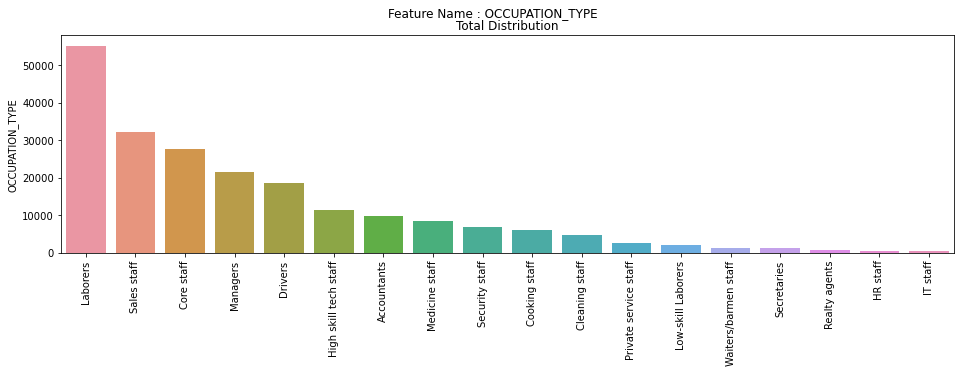

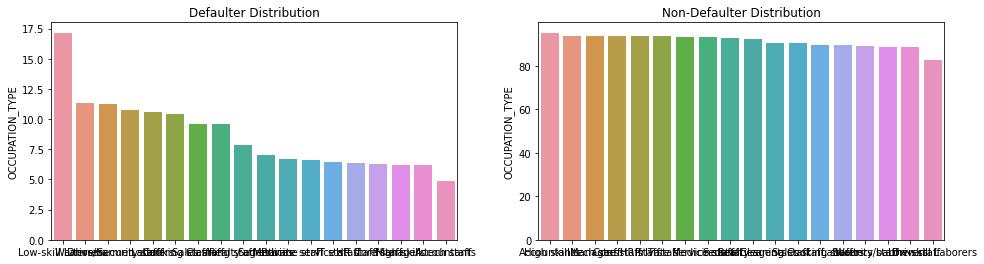



Number of null values :  96391
----------------------------------------------------


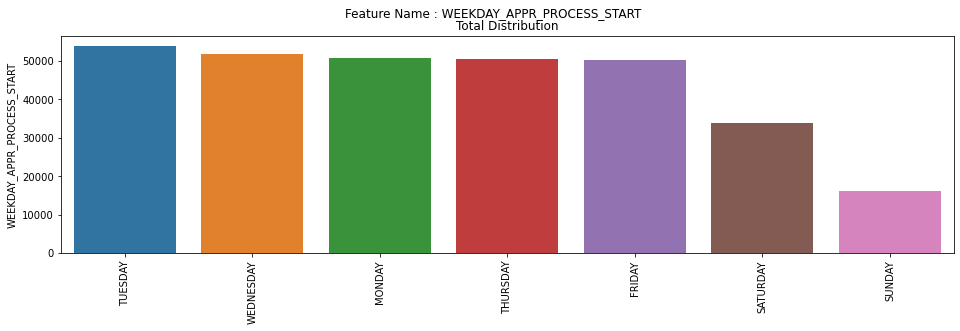

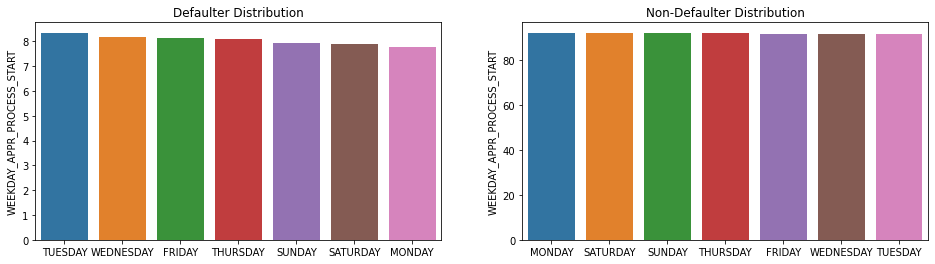



Number of null values :  0
----------------------------------------------------


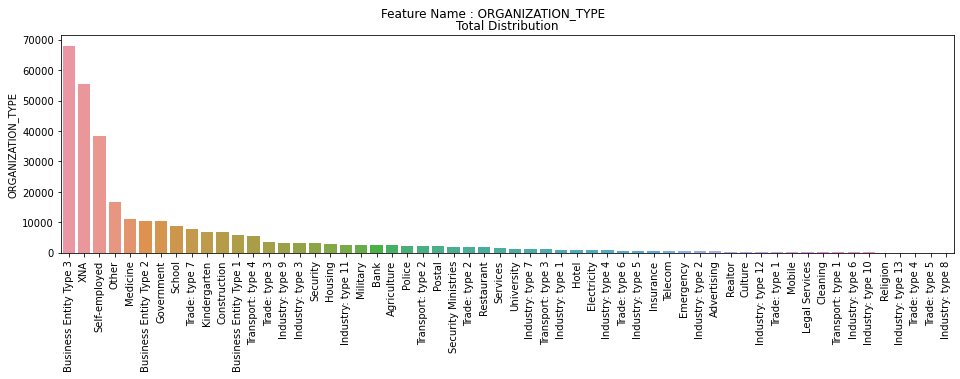

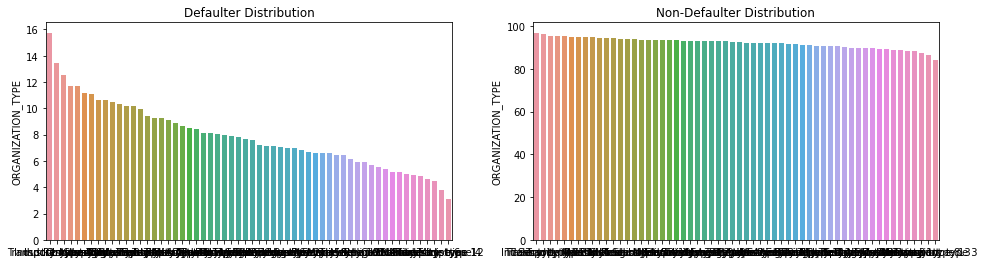



Number of null values :  0
----------------------------------------------------


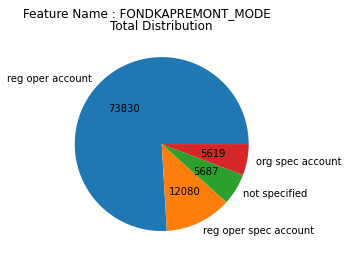

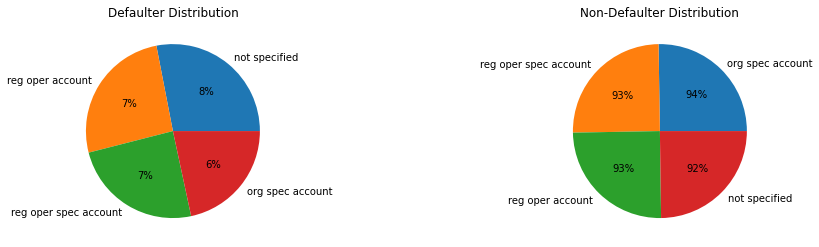



Number of null values :  210295
----------------------------------------------------


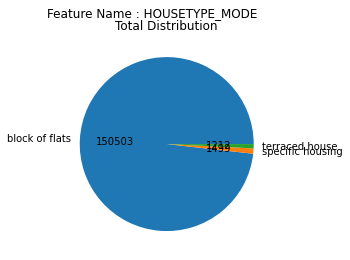

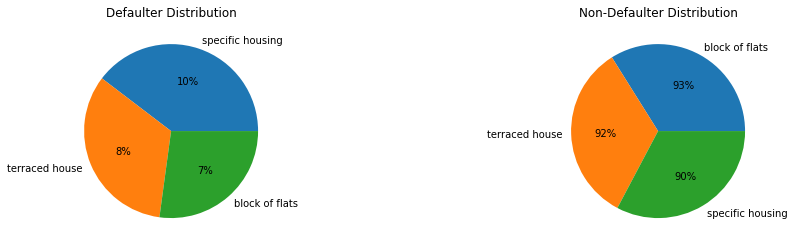



Number of null values :  154297
----------------------------------------------------


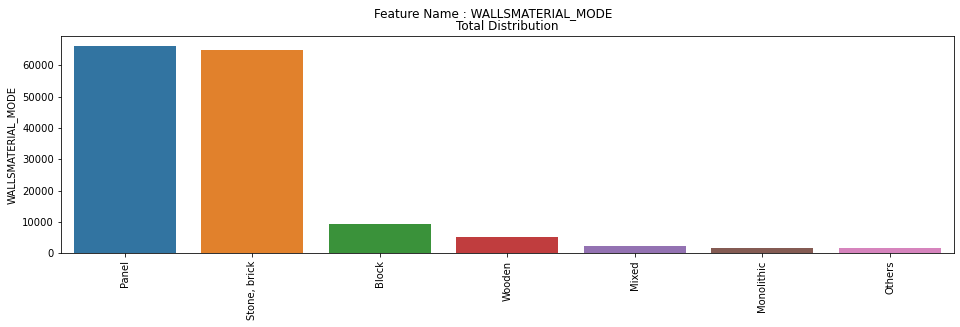

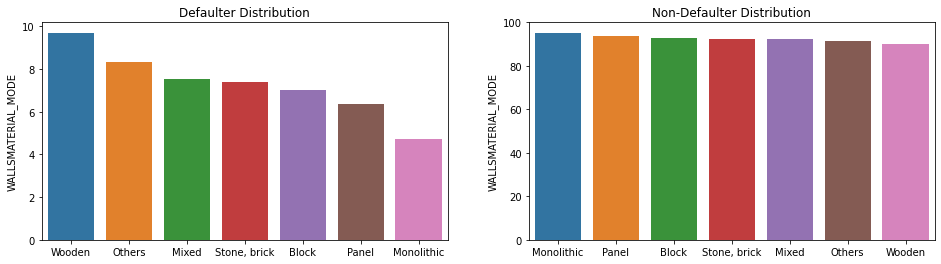



Number of null values :  156341
----------------------------------------------------


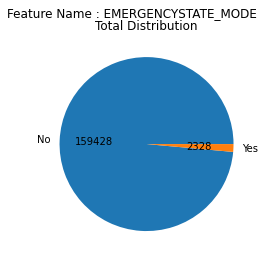

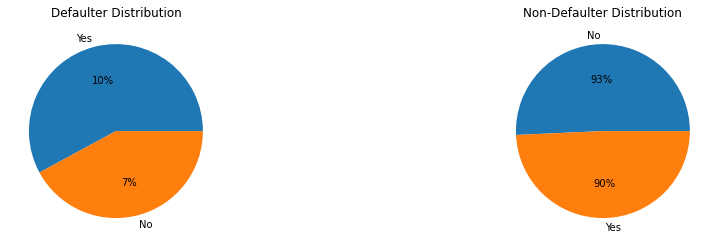



Number of null values :  145755
----------------------------------------------------


In [13]:
for i in cat_cols:
    plot_categorical(application_train,i)

# OBSERVATIONS

## NAME_CONTRACT_TYPE

1. Most Loans are cash loans.
2. Cash loans have higher percentage of defaulting.

## CODE_GENDER

1. Most Loans are taken by females.
2. Males have higher percentage of defaulting.

## FLAG_OWN_CAR

1. Most Loan takers don't have their own car.
2. Non car owners have higher percentage of defaulting.

## FLAG_OWN_REALTY

1. Most Loan takers have Y.
2. Both categories have equal percentage of defaulting.

## NAME_TYPE_SUITE

1. Most Loan takers are unaccompanied.
2.  Other_B have higher percentage of defaulting whereas loan takers with family and children have lower rate of defaulting.

## NAME_INCOME_TYPE

1. Most Loan takers are Working class.
2. Most defaulters are on Maternity Leave or Unemployed.

## NAME_EDUCATION_TYPE

1. Most Loan takers have secondary/secondary_special education.
2. Lower_secondary and secondary/secondary_special educated loadn takers have higher percentage of defaulting.

## NAME_FAMILY_STATUS

1. Most Loan takers are married  .
2. Civil married and single loan takers have higher percentage of defaulting.

## NAME_HOUSING_TYPE

1. Most Loan takers have house/apartment  .
2. Loan takers living in rented apartments or with parents have higher percentage of defaulting.

## OCCUPATION_TYPE

1. Most Loan takers are laborers or sales staff.
2. Low skill labourers and Drivers have highest rate of defaulting.
3. High number of null values.

## WEEKDAY_APPR_PROCESS_START

1. All weekdays have a similar count present with weekends having lower rate.
2. All dasy have similar percentage of defaulting.

## ORGANIZATION_TYPE

1. Most Loan takers are from Business_Type_2.
2. Lot of values are from category XNA which will needed to be filled.
3. Business-Type3 and Industry tpe 13 have higher percentage of defaulting.

## FONDKAPREMONT_MODE

1. Most Loan takers have Regr oper account  .
2. Have high number of nulls.
3. All categories have similar percentage of defaulting even though distribution is very different.

## HOUSETYPE_MODE

1. Most Loan takers have block of flats .
2. Specific housing have higher percentage of defaulting.
3. Have high number of nulls.

## WALLSMATERIAL_MODE

1. Most Loan takers have Panel and stone brick wall material.
2. Wooden and 'Others' have higher percentage of defaulting.
3. Have high number of nulls.

## EMERGENCYSTATE_MODE

1. Most Loan takers do NOT have emergency state.
2. Loan takers in emergency state have higher percentage of defaulting.
3. Have high number of nulls.

## Numerical Columns

In [14]:
application_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

## Dividing Numerical columns based on their description.

In [15]:
print(num_cols)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)


In [16]:
days_cols=[col for col in num_cols if 'DAYS_' in col]
amt_cols=[col for col in num_cols if 'AMT_' in col]
amt_cols.append('HOUR_APPR_PROCESS_START')
flags=[col for col in num_cols if 'FLAG_' in col]

region_cols = [col for col in num_cols if 'REG' in col]
region_cols.append('LIVE_CITY_NOT_WORK_CITY')
region_cols.remove('DAYS_REGISTRATION')

building_cols = [col for col in num_cols if col.endswith(('_AVG','_MODE','_MEDI'))]

ext_cols = [col for col in num_cols if col.startswith('EXT_SOURCE')]

social_cols = [col for col in num_cols if col.endswith('_SOCIAL_CIRCLE')]

family_cols = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS']

## Plotting numerical columns.

Number of null values in OWN_CAR_AGE :  202929
Number of unique values in OWN_CAR_AGE :  62
Stats
       Defaulter  Non_Defaulter
count    7113.00       92211.00
mean       11.13           9.77
std         6.85           6.57
min         0.00           0.00
25%         6.00           4.00
50%        11.00           9.00
75%        16.00          14.00
max        29.00          29.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


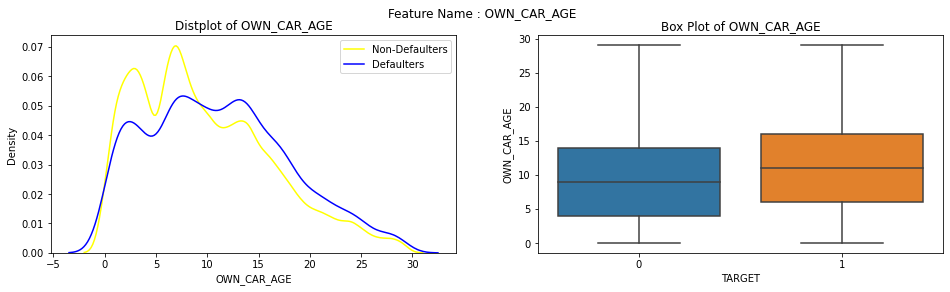

In [17]:
plot_numerical(application_train,'OWN_CAR_AGE',limits=find_outliers_IQR(application_train,'OWN_CAR_AGE'))

## Region columns.

In [18]:
region_cols

['REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY']

Number of null values in REGION_POPULATION_RELATIVE :  0
Number of unique values in REGION_POPULATION_RELATIVE :  81
Stats
       Defaulter  Non_Defaulter
count   24825.00      282686.00
mean        0.02           0.02
std         0.01           0.01
min         0.00           0.00
25%         0.01           0.01
50%         0.02           0.02
75%         0.03           0.03
max         0.07           0.07


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


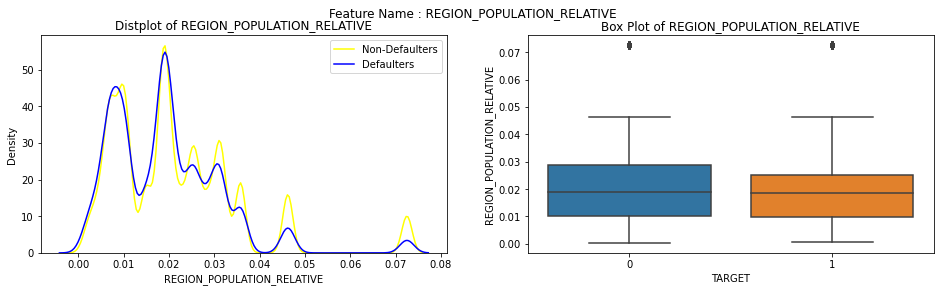

In [19]:
plot_numerical(application_train,'REGION_POPULATION_RELATIVE')

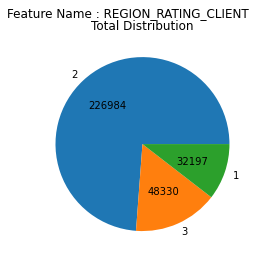

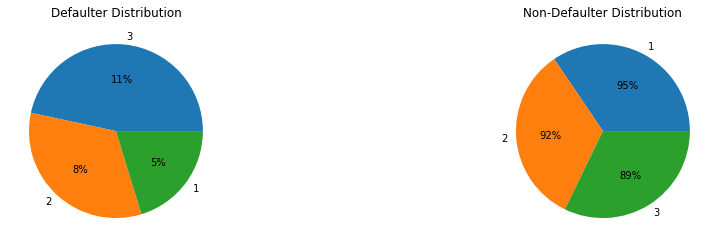



Number of null values :  0
----------------------------------------------------


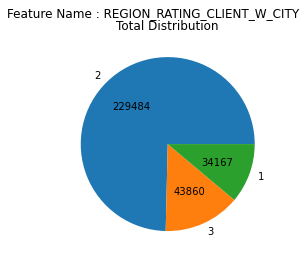

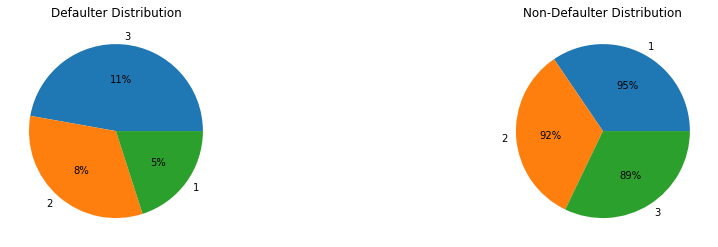



Number of null values :  0
----------------------------------------------------


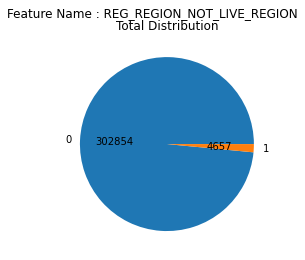

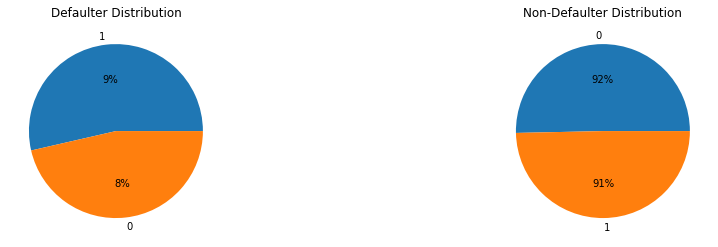



Number of null values :  0
----------------------------------------------------


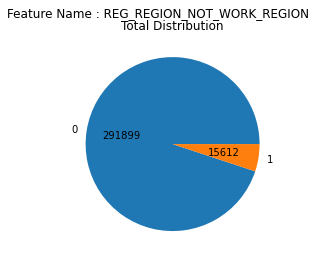

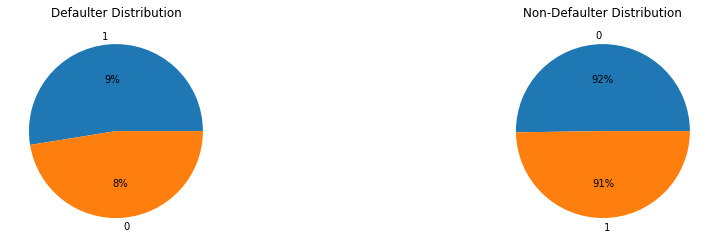



Number of null values :  0
----------------------------------------------------


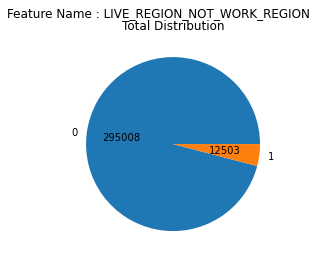

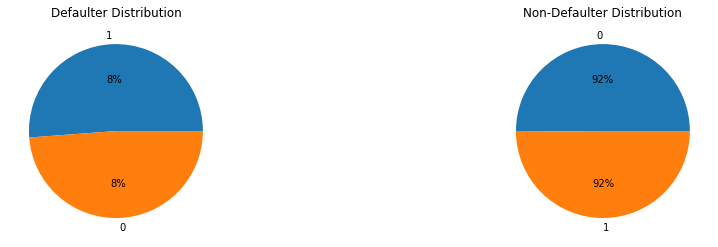



Number of null values :  0
----------------------------------------------------


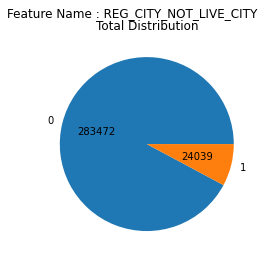

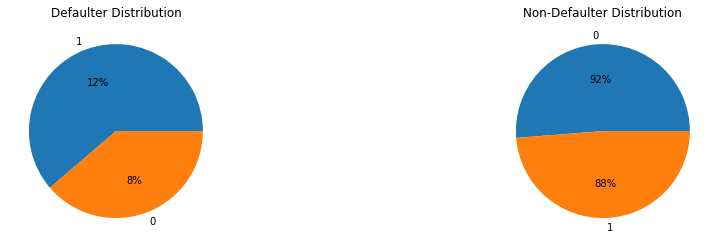



Number of null values :  0
----------------------------------------------------


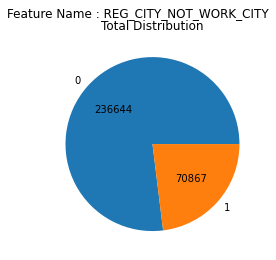

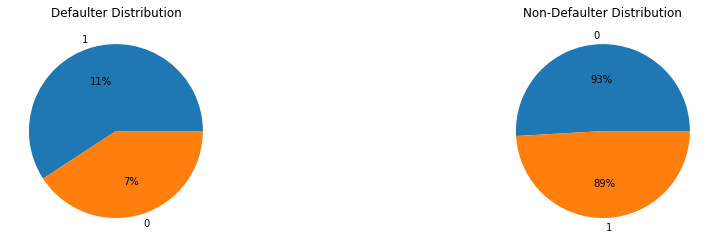



Number of null values :  0
----------------------------------------------------


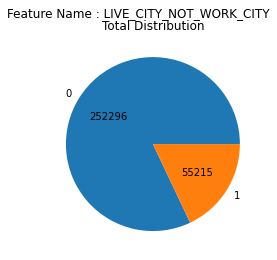

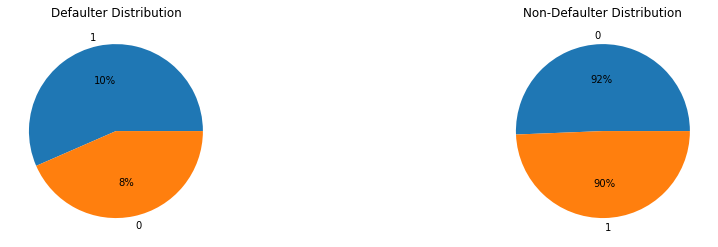



Number of null values :  0
----------------------------------------------------


In [20]:
for i in region_cols[1:]:
    plot_categorical(application_train,i)

## AMOUNT columns.

Number of null values in AMT_INCOME_TOTAL :  0
Number of unique values in AMT_INCOME_TOTAL :  2548
Stats
       Defaulter  Non_Defaulter
count   23894.00       267792.0
mean   150040.17       153416.0
std     59775.04        62812.5
min     25650.00        25650.0
25%    112500.00       112500.0
50%    135000.00       135000.0
75%    180000.00       198000.0
max    336825.00       337050.0


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


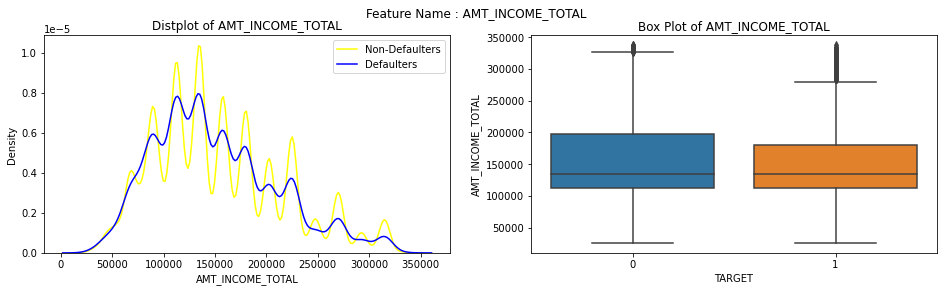

Number of null values in AMT_CREDIT :  0
Number of unique values in AMT_CREDIT :  5603
Stats
        Defaulter  Non_Defaulter
count    24555.00      276394.00
mean    542816.87      572391.63
std     316169.79      355695.71
min      45000.00       45000.00
25%     284400.00      270000.00
50%     491823.00      508495.50
75%     720000.00      804096.00
max    1615968.00     1616278.50


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


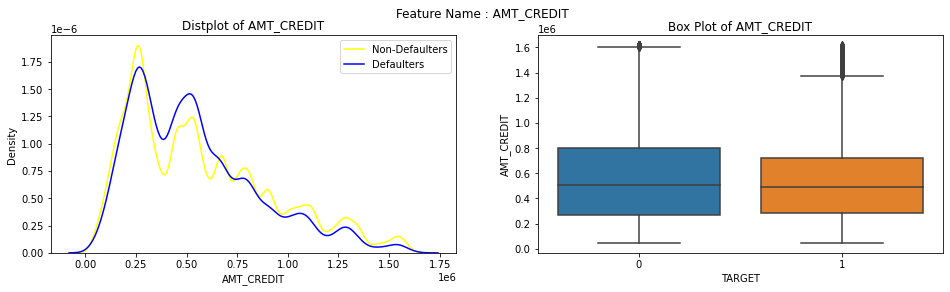

Number of null values in AMT_ANNUITY :  12
Number of unique values in AMT_ANNUITY :  13672
Stats
       Defaulter  Non_Defaulter
count   24516.00      275479.00
mean    25922.27       25924.80
std     11403.07       12300.85
min      2722.50        1615.50
25%     17194.50       16240.50
50%     25026.75       24471.00
75%     32586.75       33543.00
max     61402.50       61699.50


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


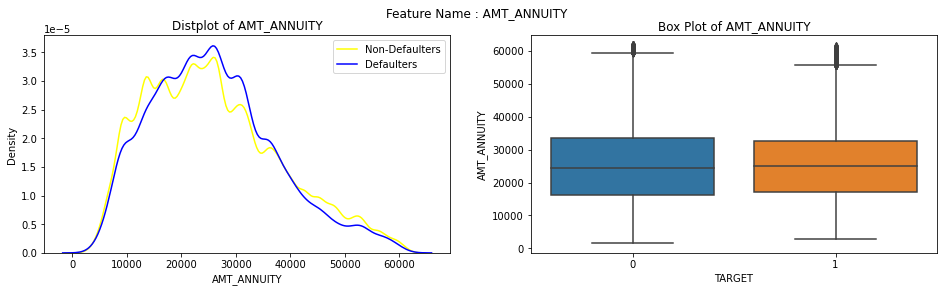

Number of null values in AMT_GOODS_PRICE :  278
Number of unique values in AMT_GOODS_PRICE :  1002
Stats
        Defaulter  Non_Defaulter
count    24199.00      268269.00
mean    462566.11      489071.48
std     263220.42      292666.54
min      45000.00       40500.00
25%     238500.00      229500.00
50%     450000.00      450000.00
75%     675000.00      675000.00
max    1332000.00     1336500.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


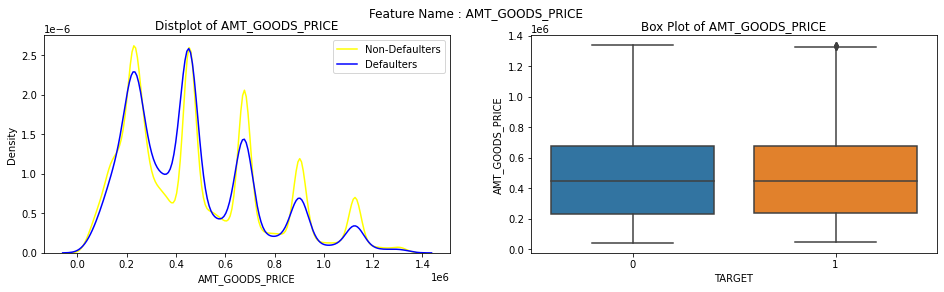

In [21]:
for col in amt_cols[:4]:
    plot_numerical(application_train,col,limits=find_outliers_IQR(application_train,col))

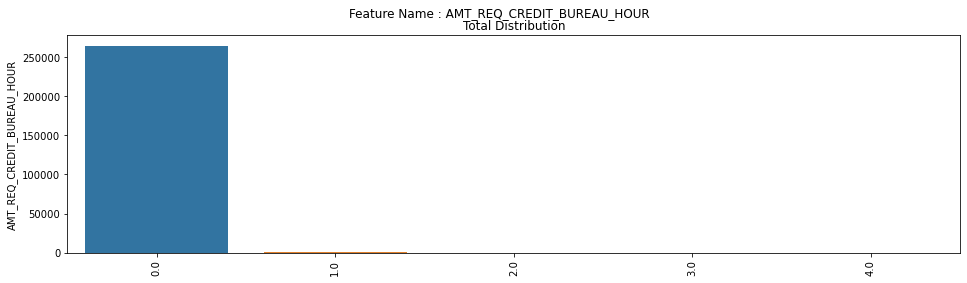

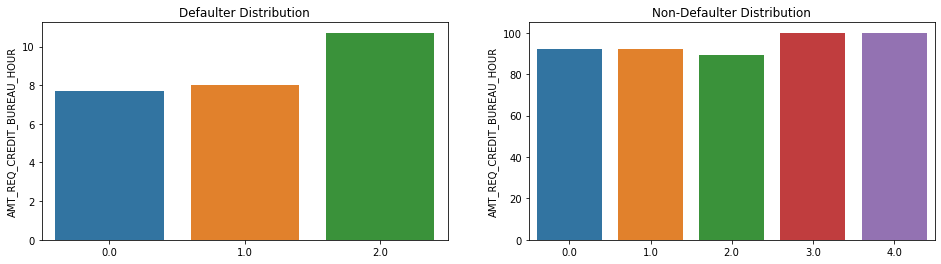



Number of null values :  41519
----------------------------------------------------


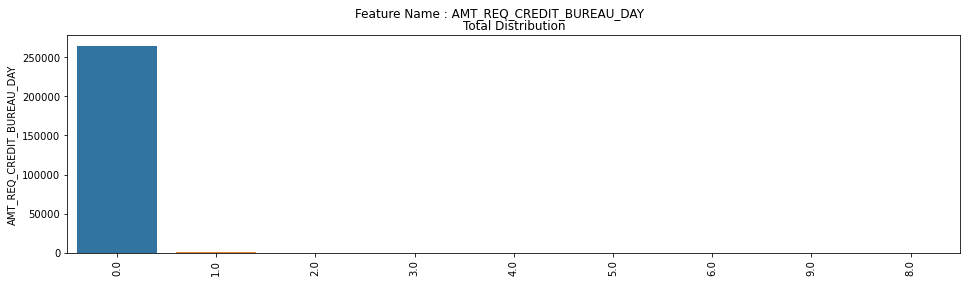

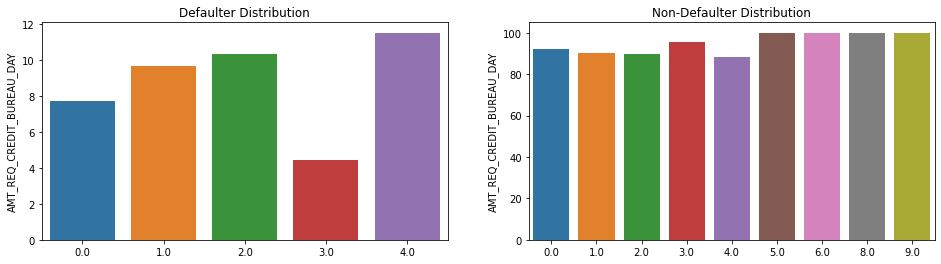



Number of null values :  41519
----------------------------------------------------


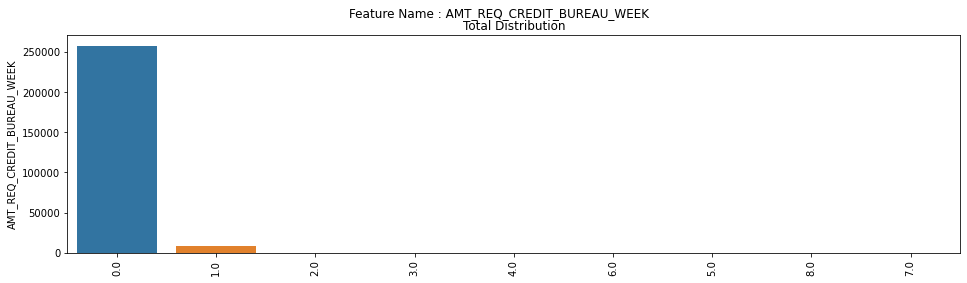

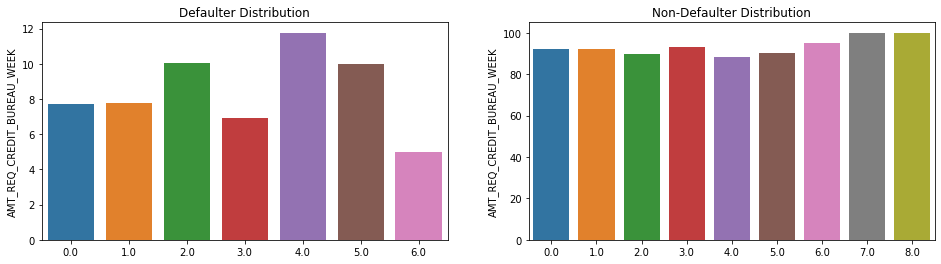



Number of null values :  41519
----------------------------------------------------


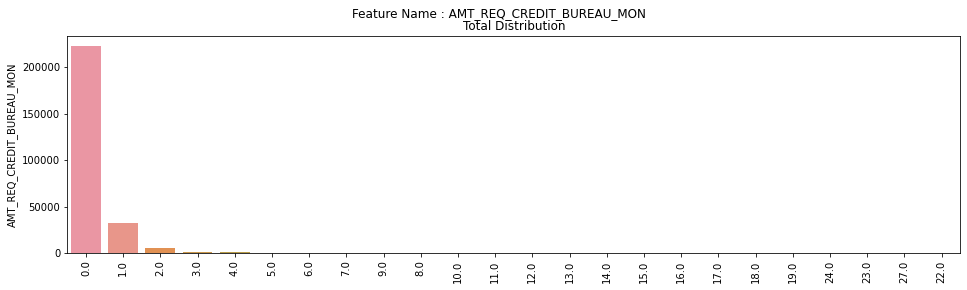

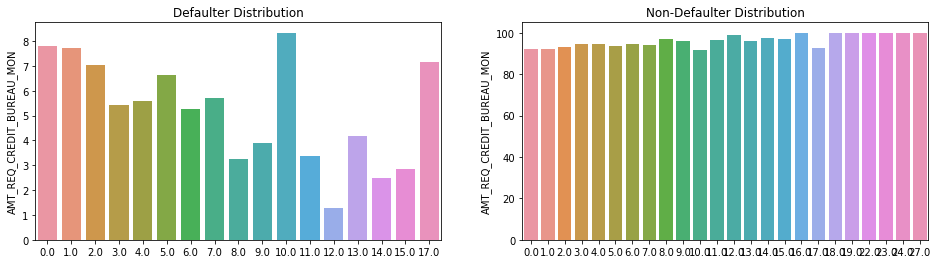



Number of null values :  41519
----------------------------------------------------


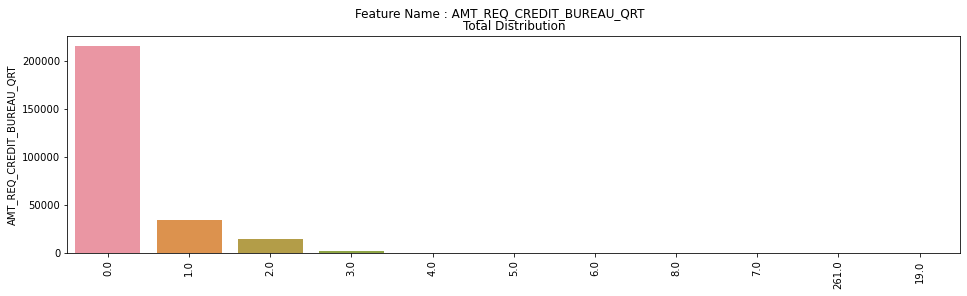

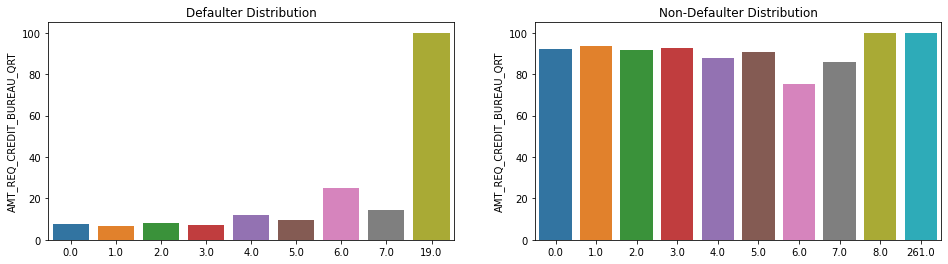



Number of null values :  41519
----------------------------------------------------


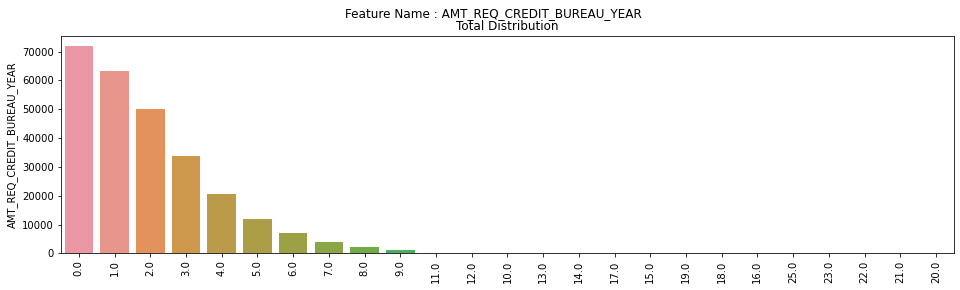

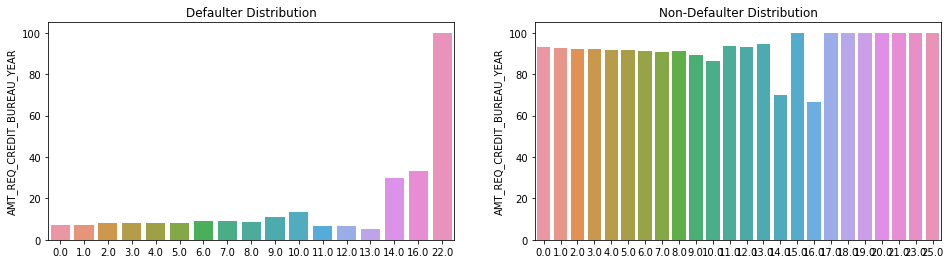



Number of null values :  41519
----------------------------------------------------


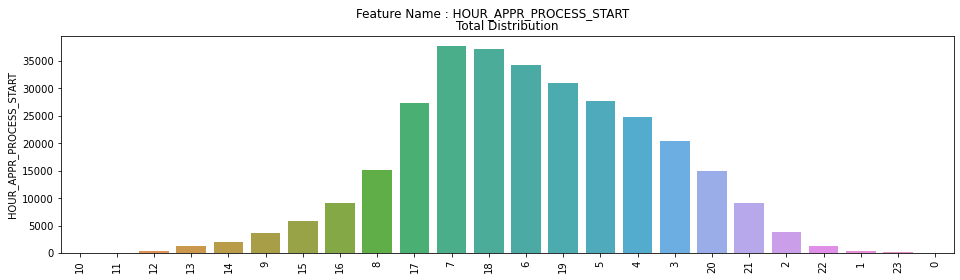

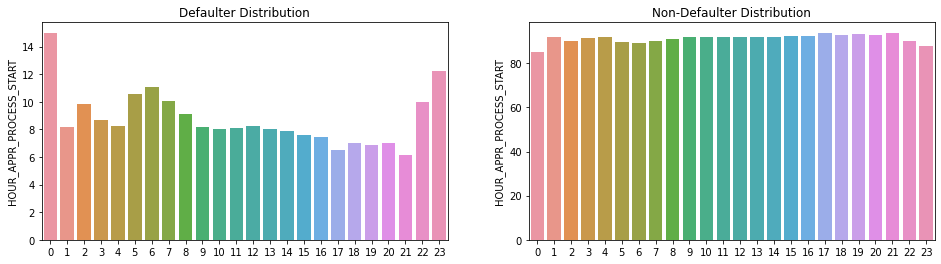



Number of null values :  0
----------------------------------------------------


In [22]:
for col in amt_cols[4:]:
    plot_categorical(application_train,col)

## Duration columns.

Number of null values in BIRTH_AGE :  0
Number of unique values in BIRTH_AGE :  17460
Stats
       Defaulter  Non_Defaulter
count   24825.00      282686.00
mean       40.78          44.21
std        11.49          11.96
min        21.04          20.52
25%        31.22          34.35
50%        39.13          43.50
75%        49.42          54.23
max        68.95          69.12


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


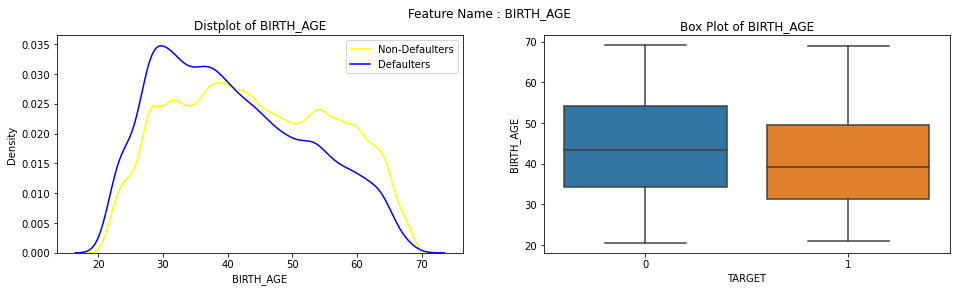

Number of null values in EMPLOYED_AGE :  0
Number of unique values in EMPLOYED_AGE :  12574
Stats
       Defaulter  Non_Defaulter
count   24825.00      282686.00
mean     -116.15        -179.99
std       327.36         391.45
min     -1000.67       -1000.67
25%         1.04           0.76
50%         2.83           3.38
75%         5.91           7.71
max        44.02          49.07


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


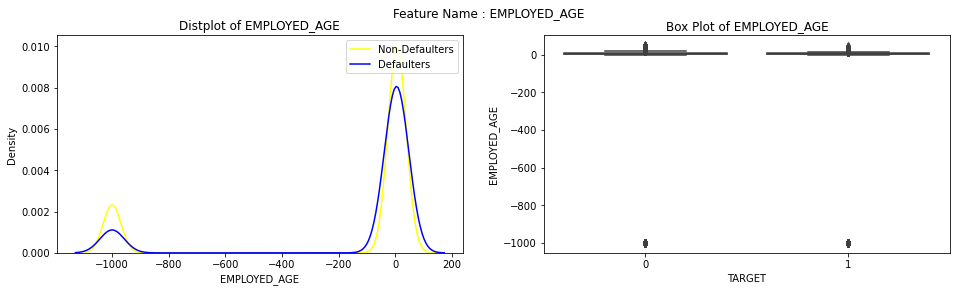

Number of null values in REGISTRATION_AGE :  0
Number of unique values in REGISTRATION_AGE :  15688
Stats
       Defaulter  Non_Defaulter
count   24825.00      282686.00
mean       12.29          13.78
std         9.04           9.69
min        -0.00          -0.00
25%         4.58           5.60
50%        11.11          12.45
75%        18.21          20.68
max        62.82          67.59


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


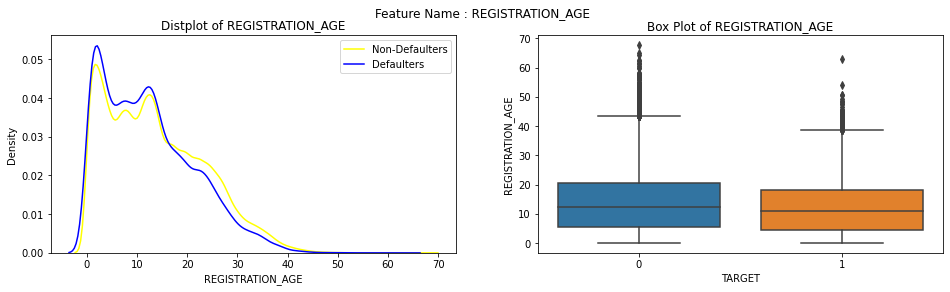

Number of null values in ID_PUBLISH_AGE :  0
Number of unique values in ID_PUBLISH_AGE :  6168
Stats
       Defaulter  Non_Defaulter
count   24825.00      282686.00
mean        7.49           8.27
std         4.16           4.13
min         0.00           0.00
25%         3.81           4.81
50%         7.66           9.03
75%        11.28          11.82
max        17.01          19.72


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


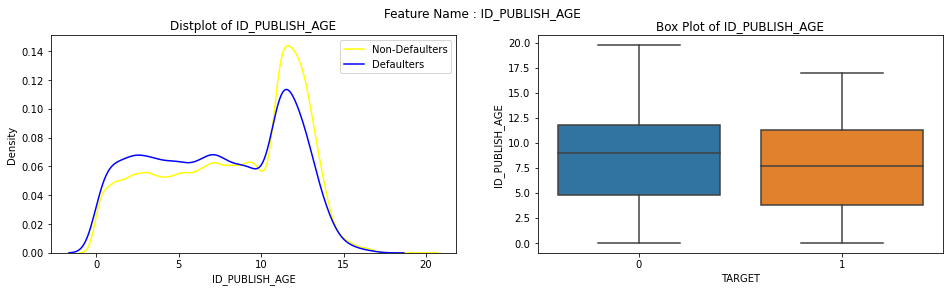

Number of null values in LAST_PHONE_CHANGE_AGE :  1
Number of unique values in LAST_PHONE_CHANGE_AGE :  3773
Stats
       Defaulter  Non_Defaulter
count   24825.00      282685.00
mean        2.22           2.68
std         2.08           2.28
min        -0.00          -0.00
25%         0.53           0.77
50%         1.63           2.13
75%         3.56           4.35
max        11.15          11.76


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


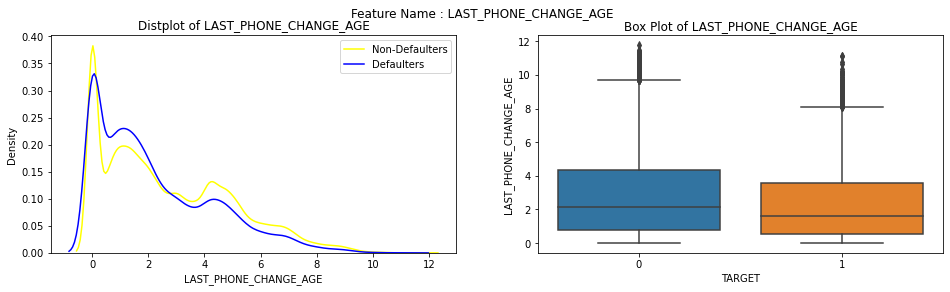

In [23]:
for col in days_cols:
    #Converting them to years.
    application_train[col.replace('DAYS_','')+'_AGE'] = application_train[col]*-1/365
    plot_numerical(application_train,col.replace('DAYS_','')+'_AGE')

## FLAG columns.

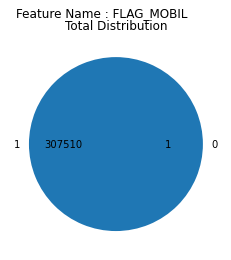

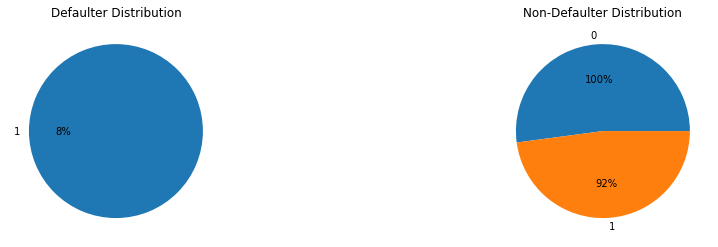



Number of null values :  0
----------------------------------------------------


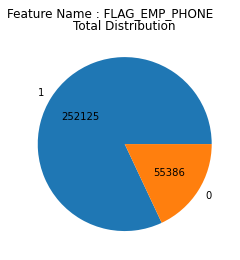

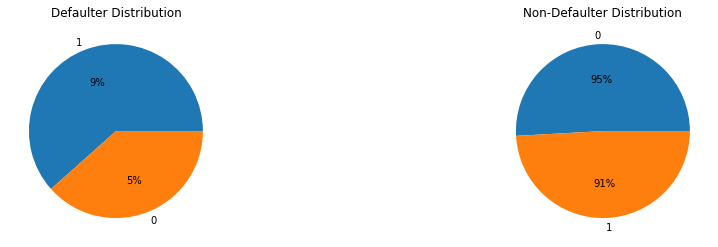



Number of null values :  0
----------------------------------------------------


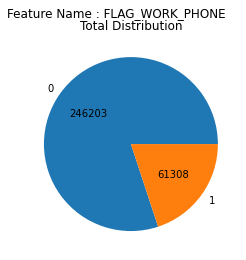

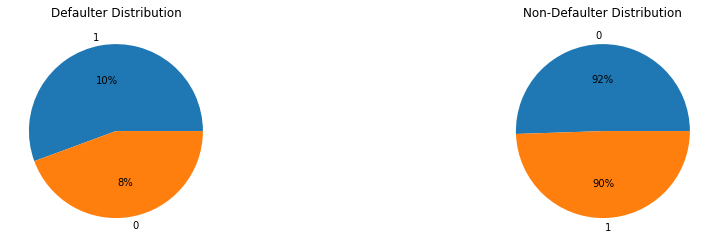



Number of null values :  0
----------------------------------------------------


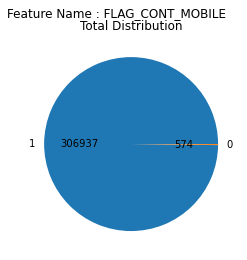

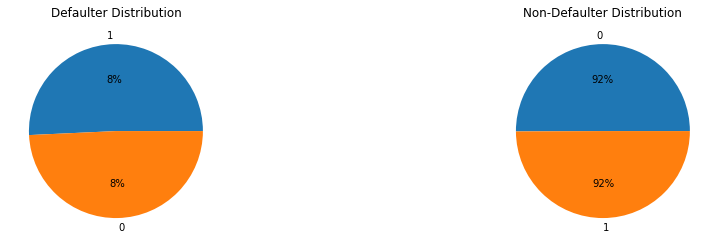



Number of null values :  0
----------------------------------------------------


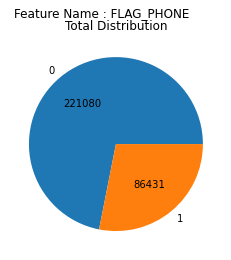

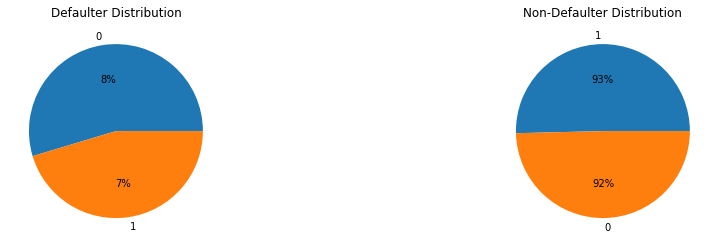



Number of null values :  0
----------------------------------------------------


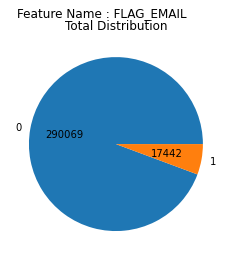

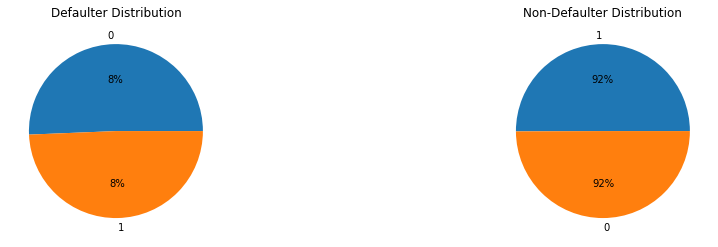



Number of null values :  0
----------------------------------------------------


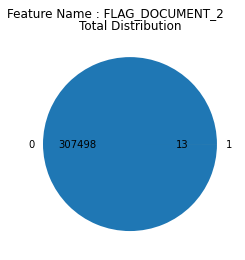

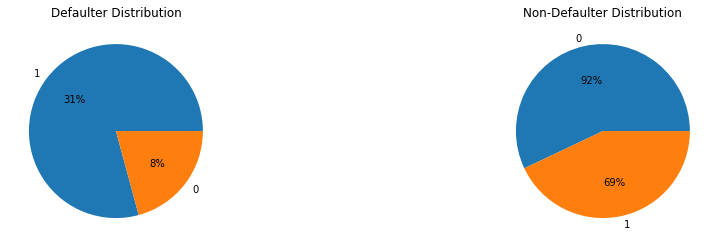



Number of null values :  0
----------------------------------------------------


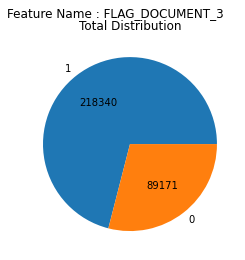

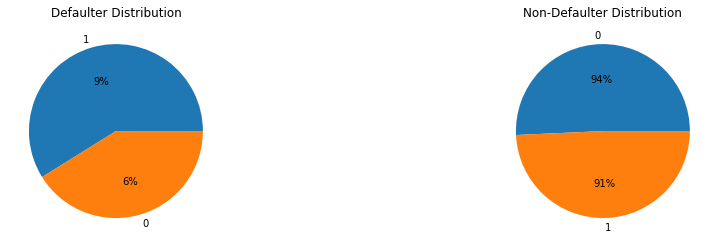



Number of null values :  0
----------------------------------------------------


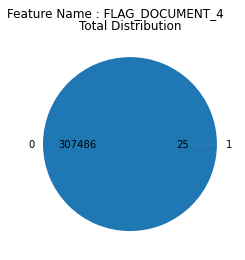

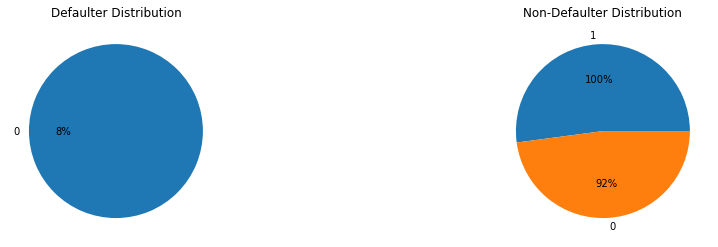



Number of null values :  0
----------------------------------------------------


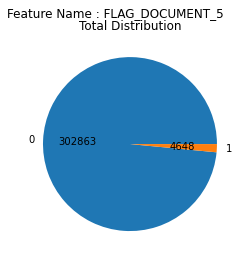

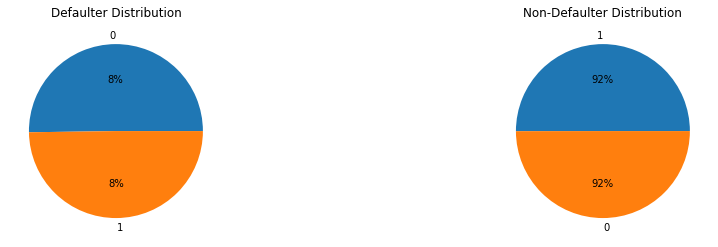



Number of null values :  0
----------------------------------------------------


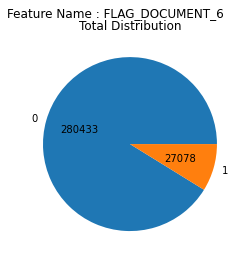

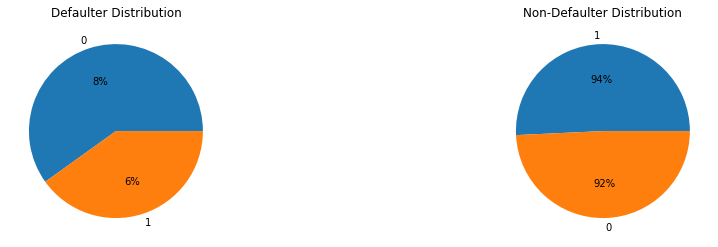



Number of null values :  0
----------------------------------------------------


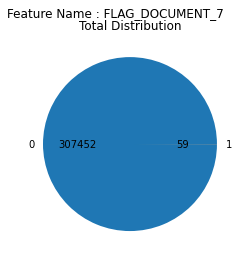

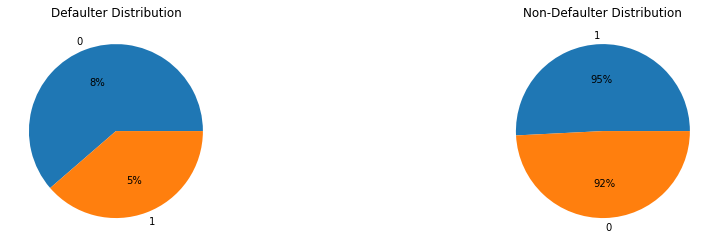



Number of null values :  0
----------------------------------------------------


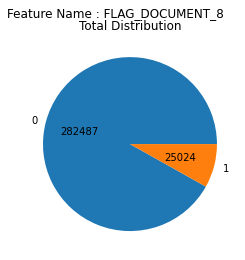

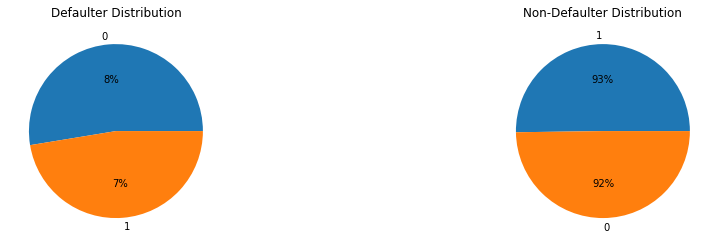



Number of null values :  0
----------------------------------------------------


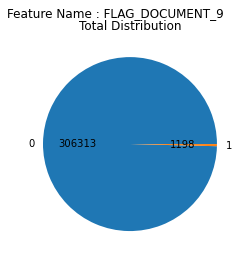

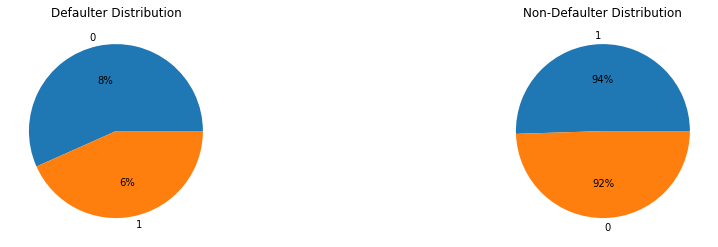



Number of null values :  0
----------------------------------------------------


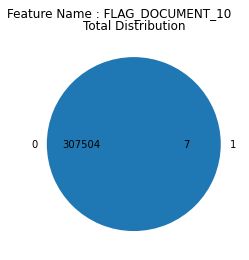

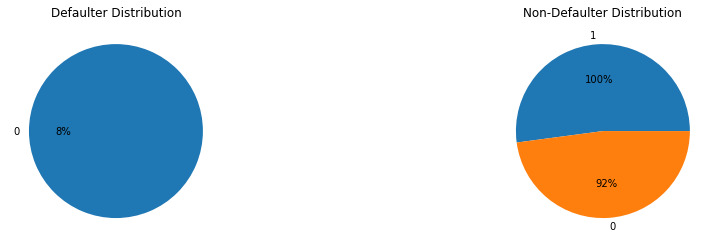



Number of null values :  0
----------------------------------------------------


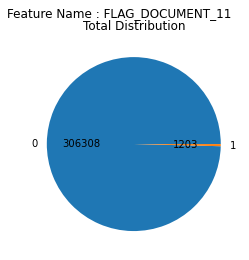

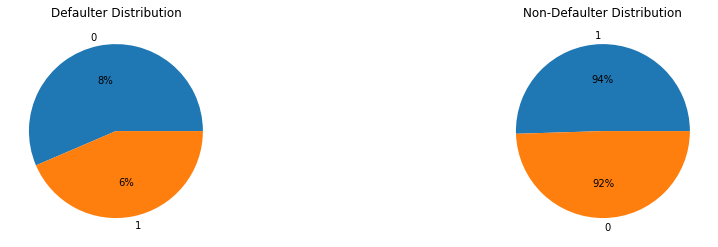



Number of null values :  0
----------------------------------------------------


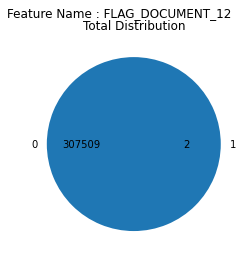

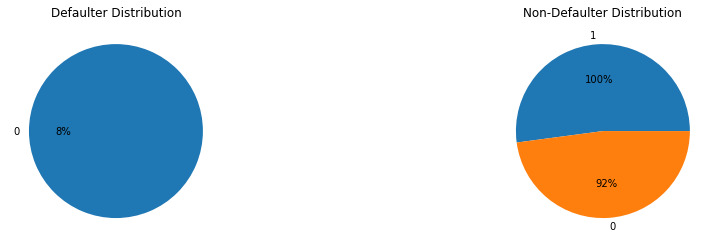



Number of null values :  0
----------------------------------------------------


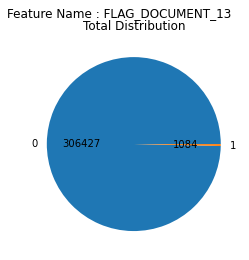

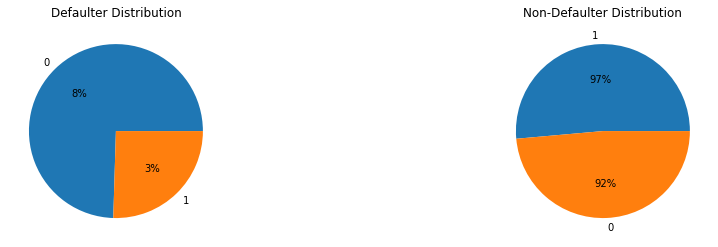



Number of null values :  0
----------------------------------------------------


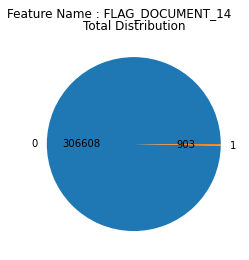

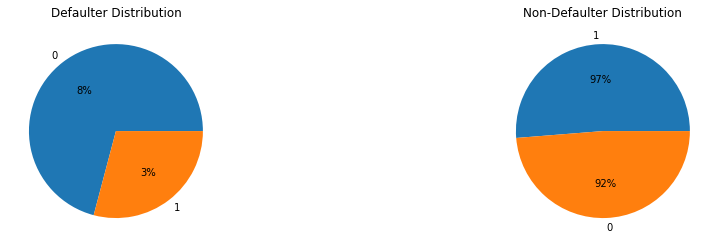



Number of null values :  0
----------------------------------------------------


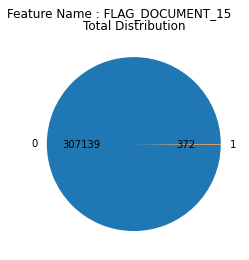

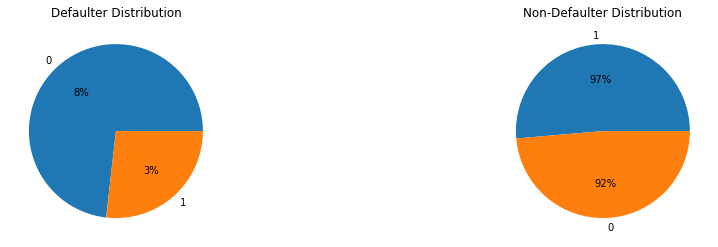



Number of null values :  0
----------------------------------------------------


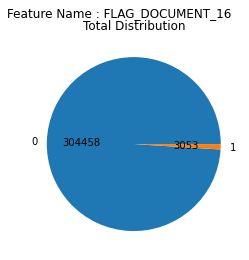

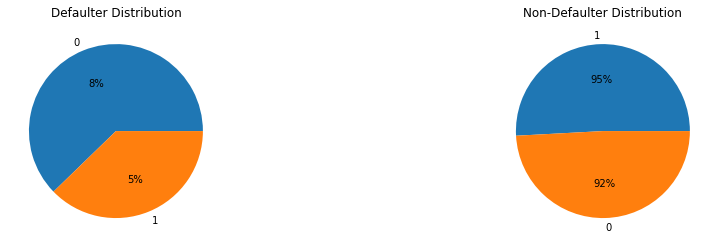



Number of null values :  0
----------------------------------------------------


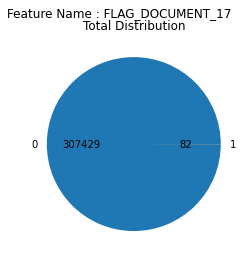

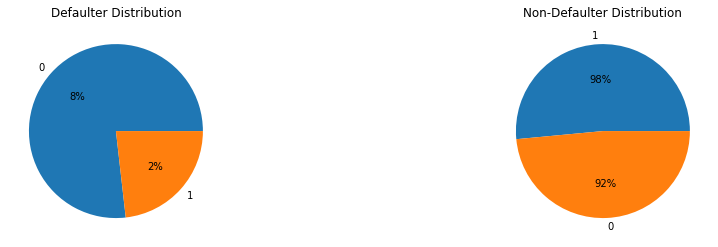



Number of null values :  0
----------------------------------------------------


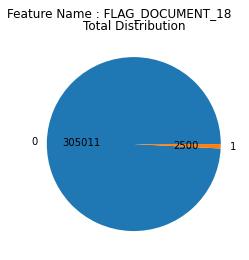

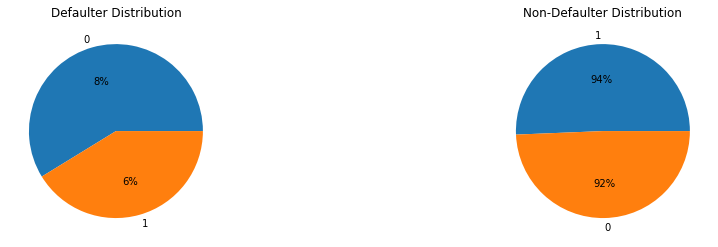



Number of null values :  0
----------------------------------------------------


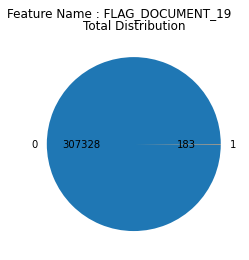

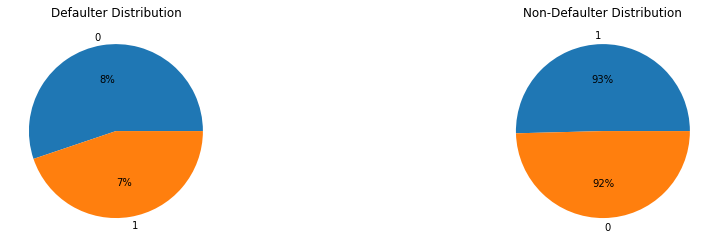



Number of null values :  0
----------------------------------------------------


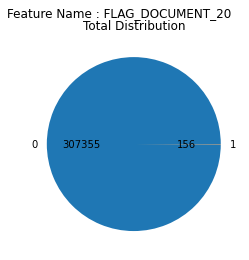

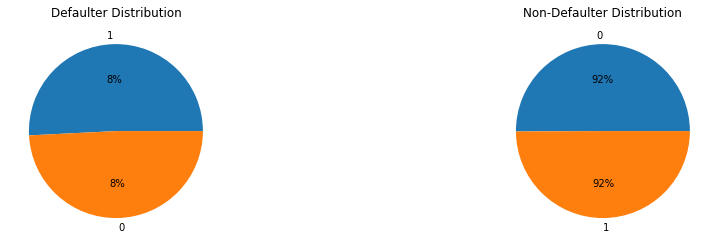



Number of null values :  0
----------------------------------------------------


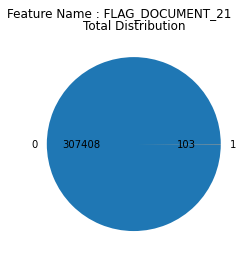

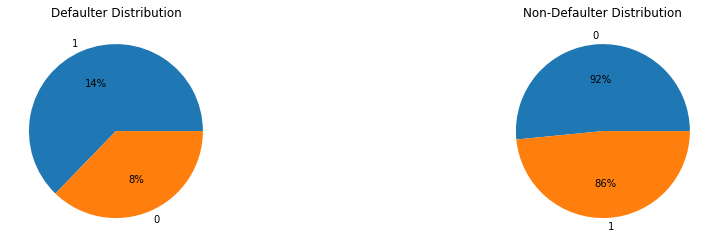



Number of null values :  0
----------------------------------------------------


In [25]:
for col in flags:
    plot_categorical(application_train,col)

## BUILDING related features.

Number of null values in APARTMENTS_AVG :  156061
Number of unique values in APARTMENTS_AVG :  2339
Stats
       Defaulter  Non_Defaulter
count   10540.00      140910.00
mean        0.11           0.12
std         0.10           0.11
min         0.00           0.00
25%         0.04           0.06
50%         0.08           0.09
75%         0.13           0.15
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


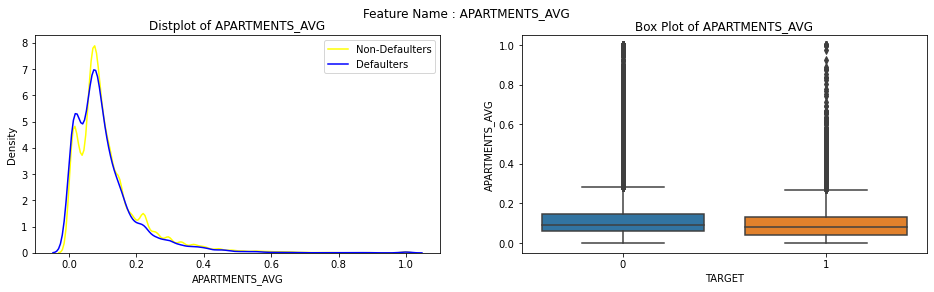

Number of null values in BASEMENTAREA_AVG :  179943
Number of unique values in BASEMENTAREA_AVG :  3780
Stats
       Defaulter  Non_Defaulter
count    8787.00      118781.00
mean        0.08           0.09
std         0.07           0.08
min         0.00           0.00
25%         0.04           0.04
50%         0.07           0.08
75%         0.11           0.11
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


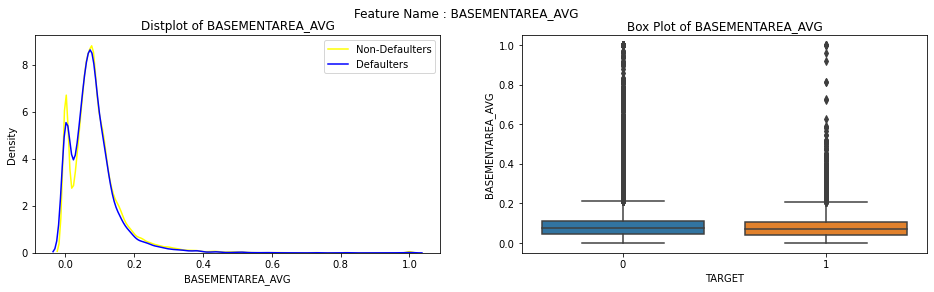

Number of null values in YEARS_BEGINEXPLUATATION_AVG :  150007
Number of unique values in YEARS_BEGINEXPLUATATION_AVG :  285
Stats
       Defaulter  Non_Defaulter
count   11017.00      146487.00
mean        0.98           0.98
std         0.07           0.06
min         0.00           0.00
25%         0.98           0.98
50%         0.98           0.98
75%         0.99           0.99
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


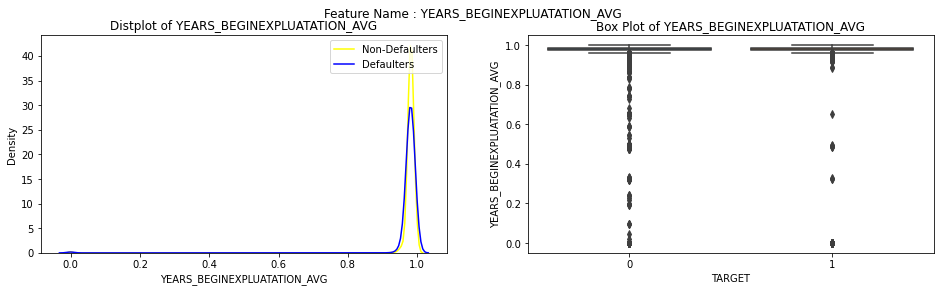

Number of null values in YEARS_BUILD_AVG :  204488
Number of unique values in YEARS_BUILD_AVG :  149
Stats
       Defaulter  Non_Defaulter
count    7074.00       95949.00
mean        0.74           0.75
std         0.11           0.11
min         0.00           0.00
25%         0.68           0.69
50%         0.75           0.76
75%         0.82           0.82
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


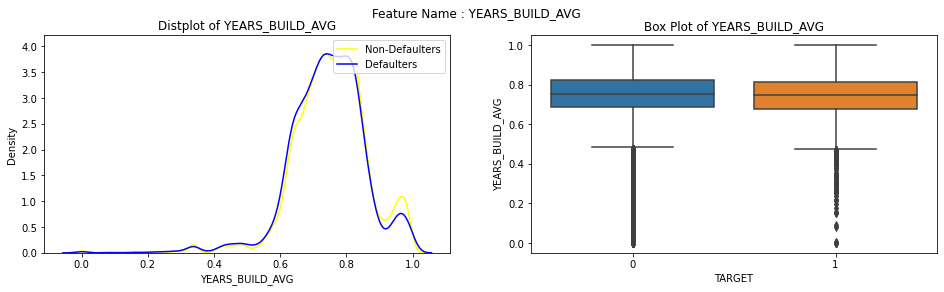

Number of null values in COMMONAREA_AVG :  214865
Number of unique values in COMMONAREA_AVG :  3181
Stats
       Defaulter  Non_Defaulter
count    6402.00       86244.00
mean        0.04           0.05
std         0.07           0.08
min         0.00           0.00
25%         0.01           0.01
50%         0.02           0.02
75%         0.05           0.05
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


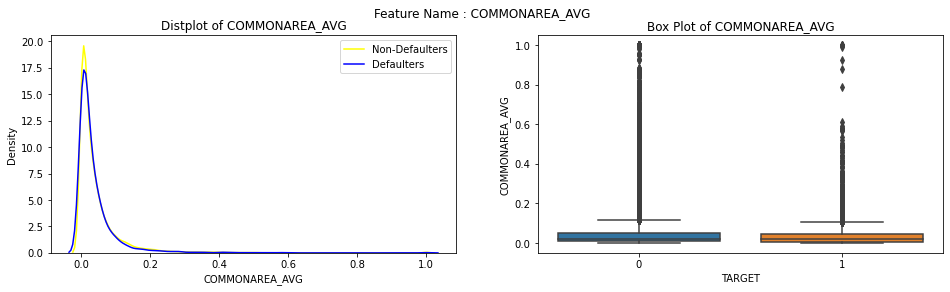

Number of null values in ELEVATORS_AVG :  163891
Number of unique values in ELEVATORS_AVG :  257
Stats
       Defaulter  Non_Defaulter
count    9910.00      133710.00
mean        0.06           0.08
std         0.12           0.14
min         0.00           0.00
25%         0.00           0.00
50%         0.00           0.00
75%         0.08           0.12
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


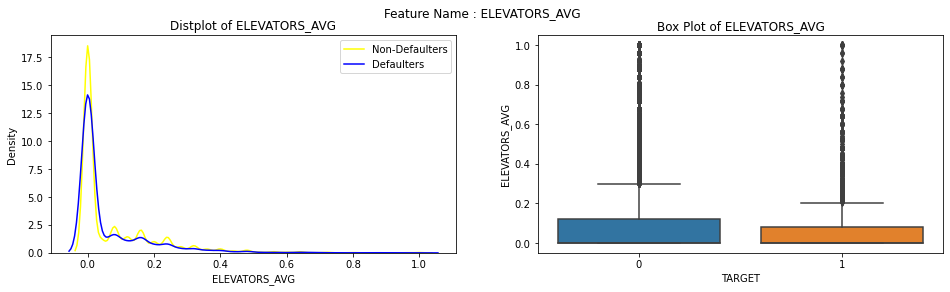

Number of null values in ENTRANCES_AVG :  154828
Number of unique values in ENTRANCES_AVG :  285
Stats
       Defaulter  Non_Defaulter
count   10614.00      142069.00
mean        0.14           0.15
std         0.10           0.10
min         0.00           0.00
25%         0.07           0.07
50%         0.14           0.14
75%         0.19           0.21
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


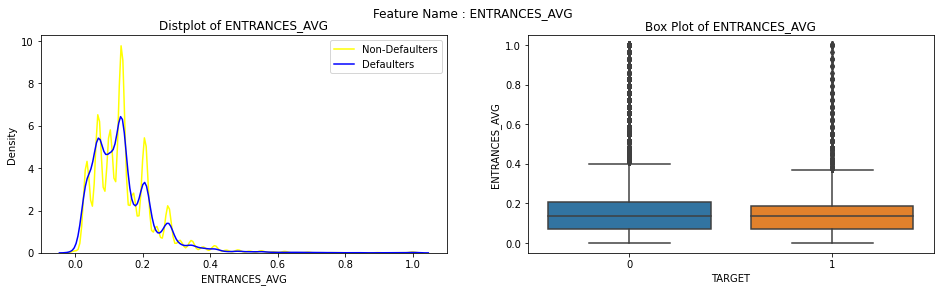

Number of null values in FLOORSMAX_AVG :  153020
Number of unique values in FLOORSMAX_AVG :  403
Stats
       Defaulter  Non_Defaulter
count   10761.00      143730.00
mean        0.20           0.23
std         0.13           0.15
min         0.00           0.00
25%         0.12           0.17
50%         0.17           0.17
75%         0.33           0.33
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


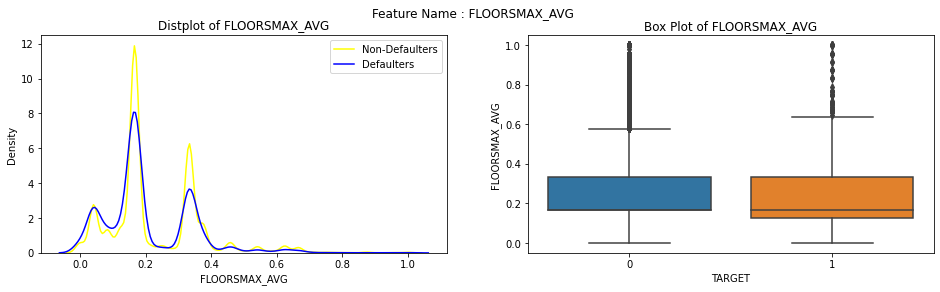

Number of null values in FLOORSMIN_AVG :  208642
Number of unique values in FLOORSMIN_AVG :  305
Stats
       Defaulter  Non_Defaulter
count    6817.00       92052.00
mean        0.21           0.23
std         0.15           0.16
min         0.00           0.00
25%         0.08           0.08
50%         0.21           0.21
75%         0.32           0.38
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


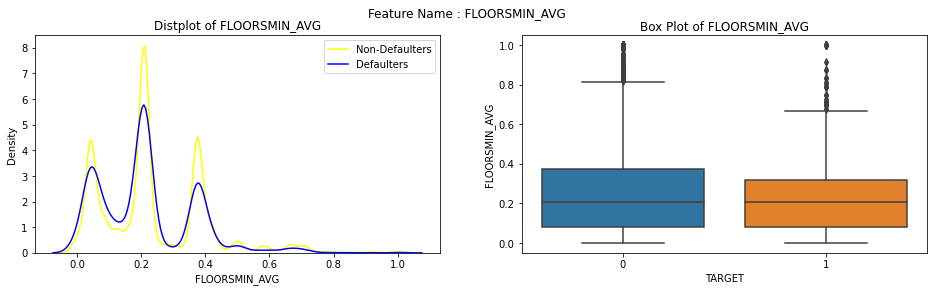

Number of null values in LANDAREA_AVG :  182590
Number of unique values in LANDAREA_AVG :  3527
Stats
       Defaulter  Non_Defaulter
count    8721.00      116200.00
mean        0.06           0.07
std         0.08           0.08
min         0.00           0.00
25%         0.02           0.02
50%         0.04           0.05
75%         0.08           0.09
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


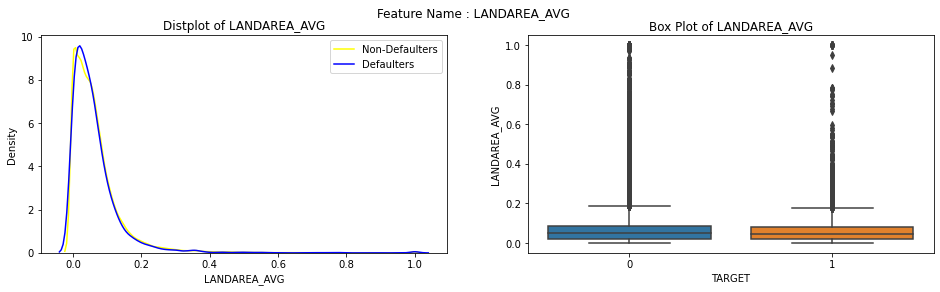

Number of null values in LIVINGAPARTMENTS_AVG :  210199
Number of unique values in LIVINGAPARTMENTS_AVG :  1868
Stats
       Defaulter  Non_Defaulter
count    6703.00       90609.00
mean        0.09           0.10
std         0.09           0.09
min         0.00           0.00
25%         0.05           0.05
50%         0.07           0.08
75%         0.12           0.12
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


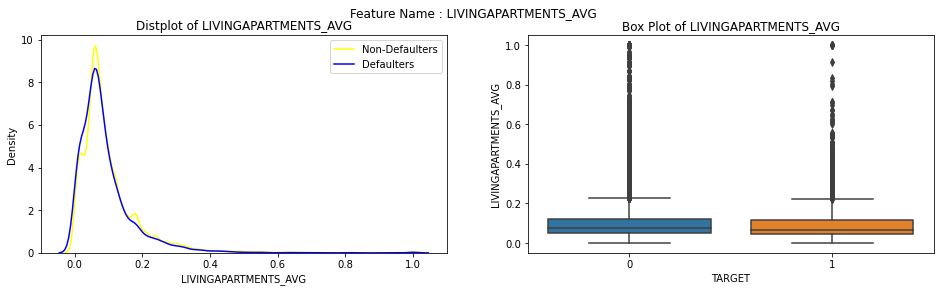

Number of null values in LIVINGAREA_AVG :  154350
Number of unique values in LIVINGAREA_AVG :  5199
Stats
       Defaulter  Non_Defaulter
count   10714.00      142447.00
mean        0.09           0.11
std         0.10           0.11
min         0.00           0.00
25%         0.04           0.05
50%         0.07           0.08
75%         0.11           0.13
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


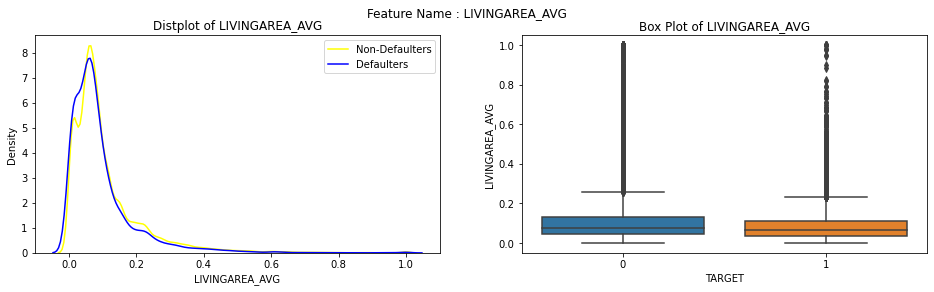

Number of null values in NONLIVINGAPARTMENTS_AVG :  213514
Number of unique values in NONLIVINGAPARTMENTS_AVG :  386
Stats
       Defaulter  Non_Defaulter
count    6498.00       87499.00
mean        0.01           0.01
std         0.05           0.05
min         0.00           0.00
25%         0.00           0.00
50%         0.00           0.00
75%         0.00           0.00
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


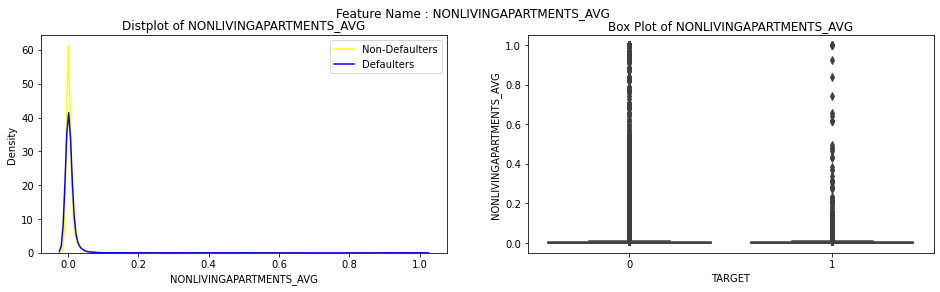

Number of null values in NONLIVINGAREA_AVG :  169682
Number of unique values in NONLIVINGAREA_AVG :  3290
Stats
       Defaulter  Non_Defaulter
count    9495.00      128334.00
mean        0.02           0.03
std         0.06           0.07
min         0.00           0.00
25%         0.00           0.00
50%         0.00           0.00
75%         0.02           0.03
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


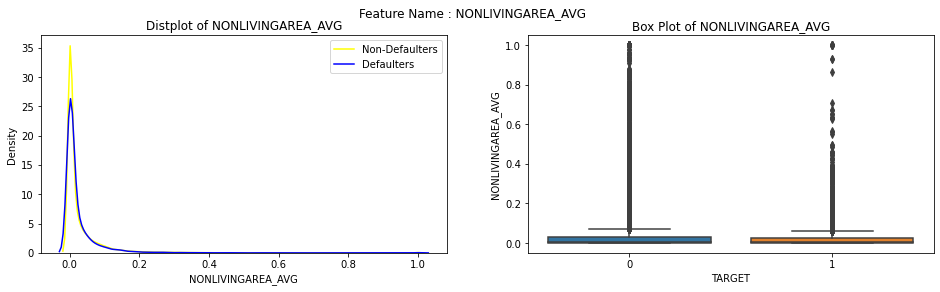

Number of null values in APARTMENTS_MODE :  156061
Number of unique values in APARTMENTS_MODE :  760
Stats
       Defaulter  Non_Defaulter
count   10540.00      140910.00
mean        0.10           0.12
std         0.10           0.11
min         0.00           0.00
25%         0.04           0.05
50%         0.08           0.08
75%         0.13           0.15
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


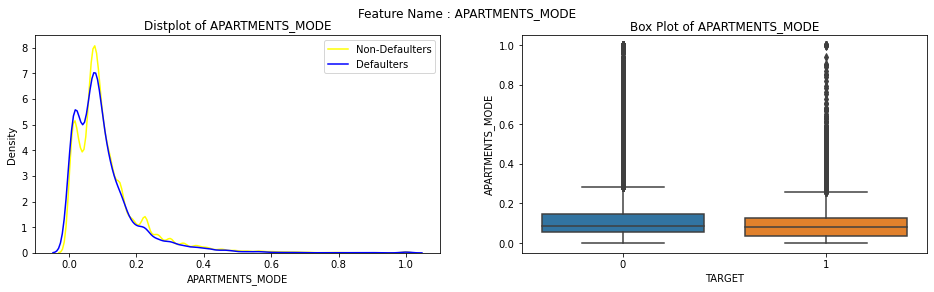

Number of null values in BASEMENTAREA_MODE :  179943
Number of unique values in BASEMENTAREA_MODE :  3841
Stats
       Defaulter  Non_Defaulter
count    8787.00      118781.00
mean        0.08           0.09
std         0.08           0.08
min         0.00           0.00
25%         0.04           0.04
50%         0.07           0.07
75%         0.11           0.11
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


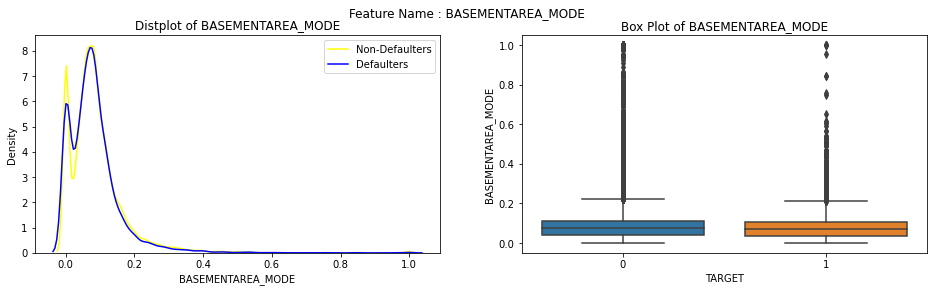

Number of null values in YEARS_BEGINEXPLUATATION_MODE :  150007
Number of unique values in YEARS_BEGINEXPLUATATION_MODE :  221
Stats
       Defaulter  Non_Defaulter
count   11017.00      146487.00
mean        0.97           0.98
std         0.07           0.06
min         0.00           0.00
25%         0.98           0.98
50%         0.98           0.98
75%         0.99           0.99
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


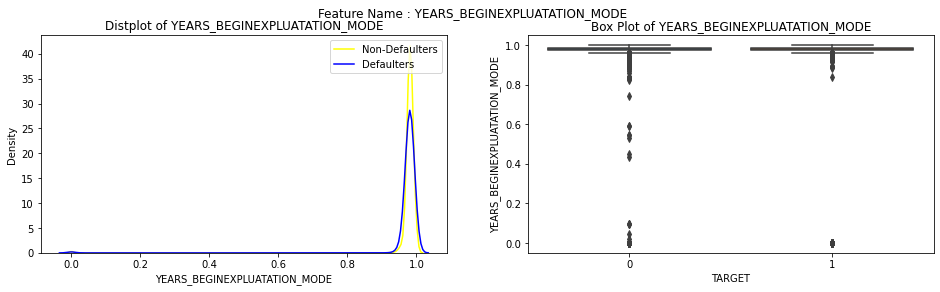

Number of null values in YEARS_BUILD_MODE :  204488
Number of unique values in YEARS_BUILD_MODE :  154
Stats
       Defaulter  Non_Defaulter
count    7074.00       95949.00
mean        0.75           0.76
std         0.11           0.11
min         0.00           0.00
25%         0.69           0.70
50%         0.76           0.76
75%         0.82           0.83
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


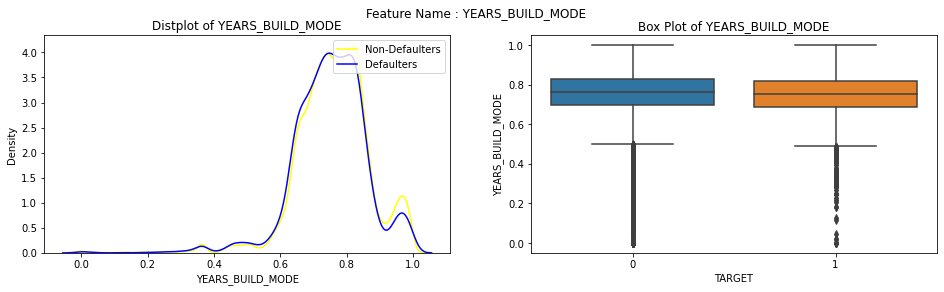

Number of null values in COMMONAREA_MODE :  214865
Number of unique values in COMMONAREA_MODE :  3128
Stats
       Defaulter  Non_Defaulter
count    6402.00       86244.00
mean        0.04           0.04
std         0.07           0.08
min         0.00           0.00
25%         0.01           0.01
50%         0.02           0.02
75%         0.04           0.05
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


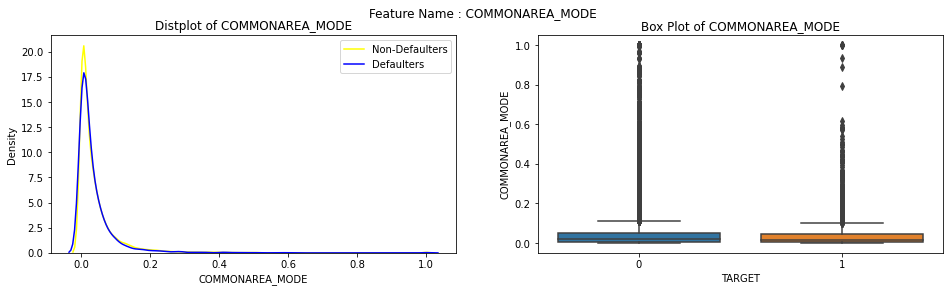

Number of null values in ELEVATORS_MODE :  163891
Number of unique values in ELEVATORS_MODE :  26
Stats
       Defaulter  Non_Defaulter
count    9910.00      133710.00
mean        0.06           0.08
std         0.12           0.13
min         0.00           0.00
25%         0.00           0.00
50%         0.00           0.00
75%         0.08           0.12
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


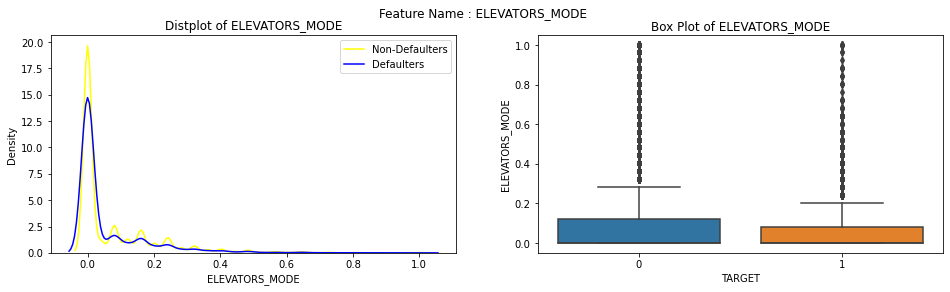

Number of null values in ENTRANCES_MODE :  154828
Number of unique values in ENTRANCES_MODE :  30
Stats
       Defaulter  Non_Defaulter
count   10614.00      142069.00
mean        0.14           0.15
std         0.10           0.10
min         0.00           0.00
25%         0.07           0.07
50%         0.14           0.14
75%         0.17           0.21
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


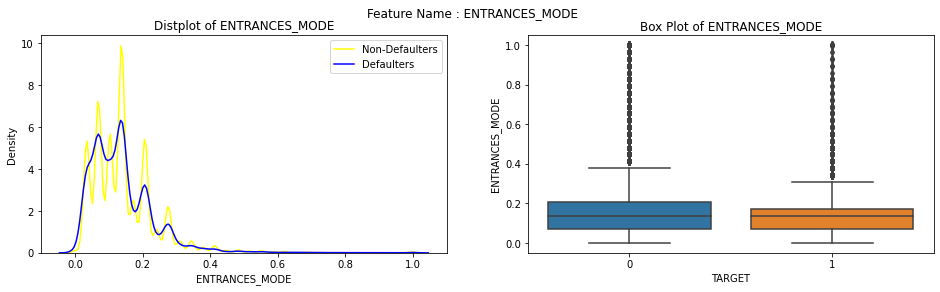

Number of null values in FLOORSMAX_MODE :  153020
Number of unique values in FLOORSMAX_MODE :  25
Stats
       Defaulter  Non_Defaulter
count   10761.00      143730.00
mean        0.20           0.22
std         0.13           0.14
min         0.00           0.00
25%         0.12           0.17
50%         0.17           0.17
75%         0.33           0.33
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


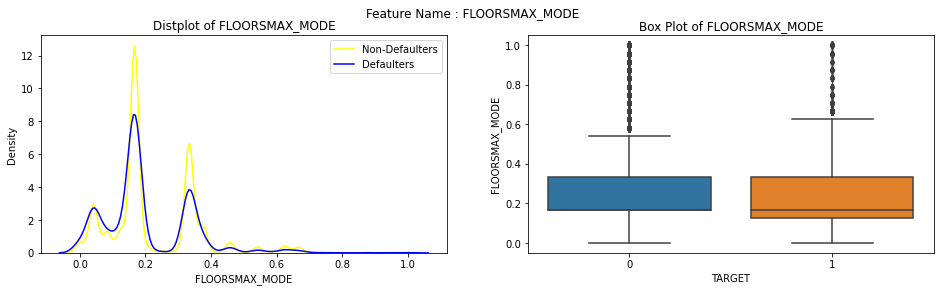

Number of null values in FLOORSMIN_MODE :  208642
Number of unique values in FLOORSMIN_MODE :  25
Stats
       Defaulter  Non_Defaulter
count    6817.00       92052.00
mean        0.21           0.23
std         0.15           0.16
min         0.00           0.00
25%         0.08           0.08
50%         0.21           0.21
75%         0.29           0.38
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


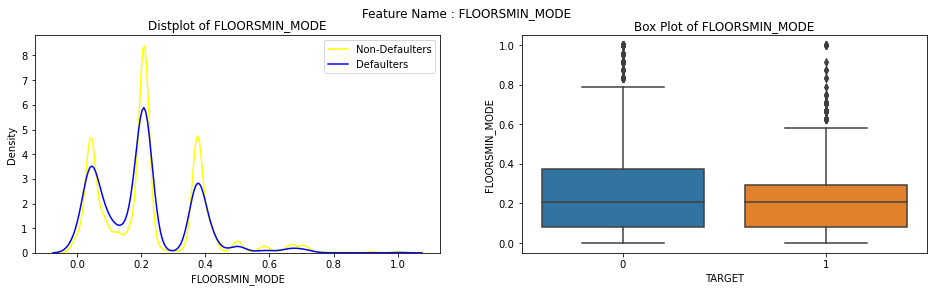

Number of null values in LANDAREA_MODE :  182590
Number of unique values in LANDAREA_MODE :  3563
Stats
       Defaulter  Non_Defaulter
count    8721.00      116200.00
mean        0.06           0.07
std         0.08           0.08
min         0.00           0.00
25%         0.02           0.02
50%         0.04           0.05
75%         0.08           0.08
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


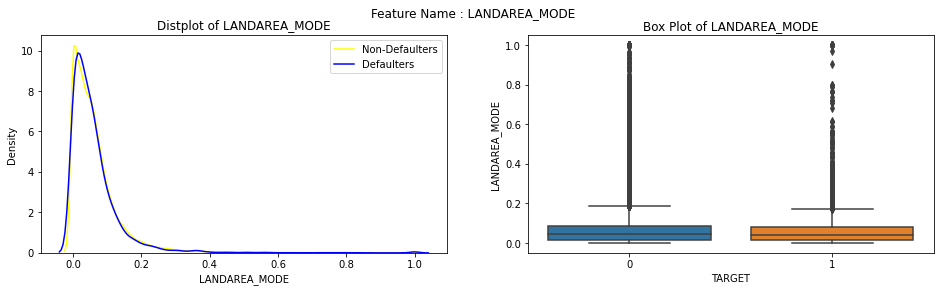

Number of null values in LIVINGAPARTMENTS_MODE :  210199
Number of unique values in LIVINGAPARTMENTS_MODE :  736
Stats
       Defaulter  Non_Defaulter
count    6703.00       90609.00
mean        0.10           0.11
std         0.09           0.10
min         0.00           0.00
25%         0.04           0.05
50%         0.07           0.08
75%         0.12           0.13
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


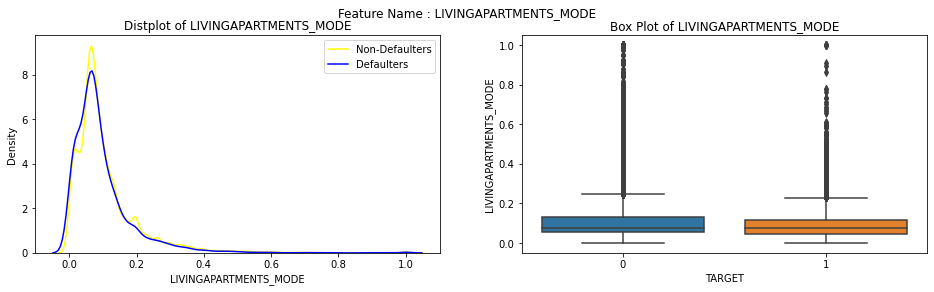

Number of null values in LIVINGAREA_MODE :  154350
Number of unique values in LIVINGAREA_MODE :  5301
Stats
       Defaulter  Non_Defaulter
count   10714.00      142447.00
mean        0.09           0.11
std         0.10           0.11
min         0.00           0.00
25%         0.03           0.04
50%         0.07           0.07
75%         0.11           0.13
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


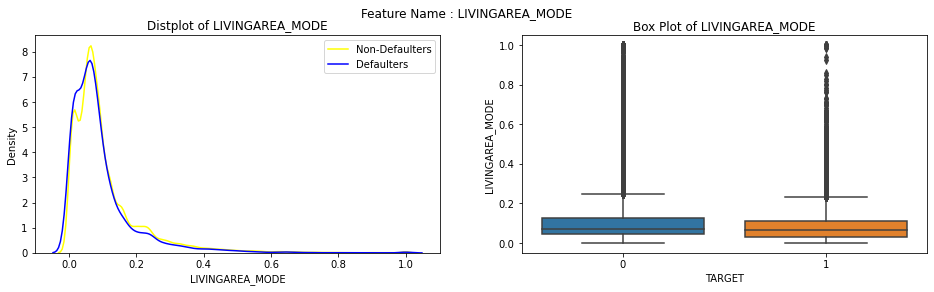

Number of null values in NONLIVINGAPARTMENTS_MODE :  213514
Number of unique values in NONLIVINGAPARTMENTS_MODE :  167
Stats
       Defaulter  Non_Defaulter
count    6498.00       87499.00
mean        0.01           0.01
std         0.05           0.05
min         0.00           0.00
25%         0.00           0.00
50%         0.00           0.00
75%         0.00           0.00
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


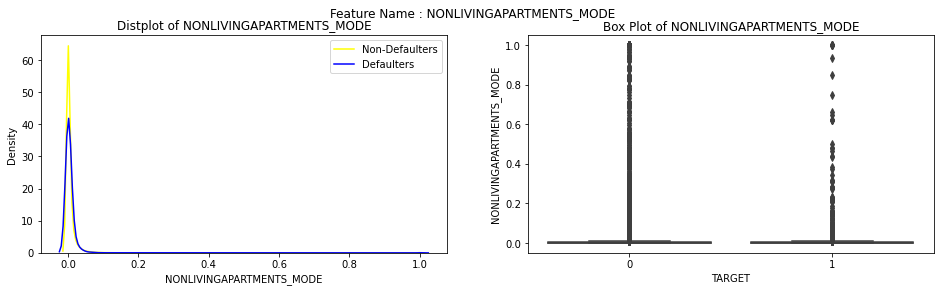

Number of null values in NONLIVINGAREA_MODE :  169682
Number of unique values in NONLIVINGAREA_MODE :  3327
Stats
       Defaulter  Non_Defaulter
count    9495.00      128334.00
mean        0.02           0.03
std         0.06           0.07
min         0.00           0.00
25%         0.00           0.00
50%         0.00           0.00
75%         0.02           0.02
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


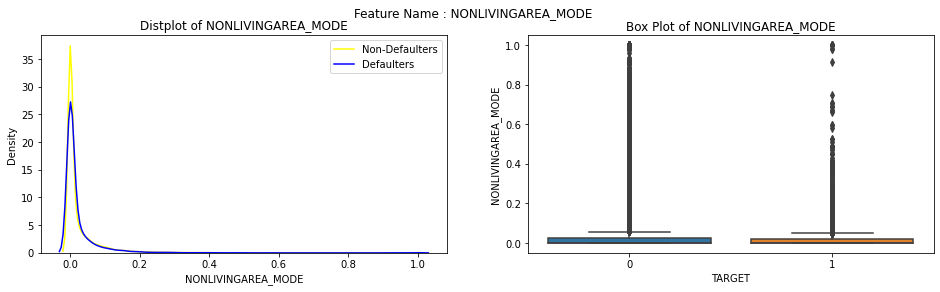

Number of null values in APARTMENTS_MEDI :  156061
Number of unique values in APARTMENTS_MEDI :  1148
Stats
       Defaulter  Non_Defaulter
count   10540.00      140910.00
mean        0.11           0.12
std         0.10           0.11
min         0.00           0.00
25%         0.04           0.06
50%         0.08           0.09
75%         0.13           0.15
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


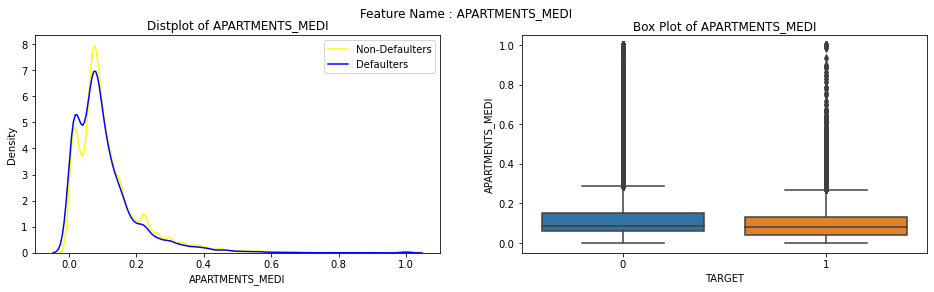

Number of null values in BASEMENTAREA_MEDI :  179943
Number of unique values in BASEMENTAREA_MEDI :  3772
Stats
       Defaulter  Non_Defaulter
count    8787.00      118781.00
mean        0.08           0.09
std         0.07           0.08
min         0.00           0.00
25%         0.04           0.04
50%         0.07           0.08
75%         0.11           0.11
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


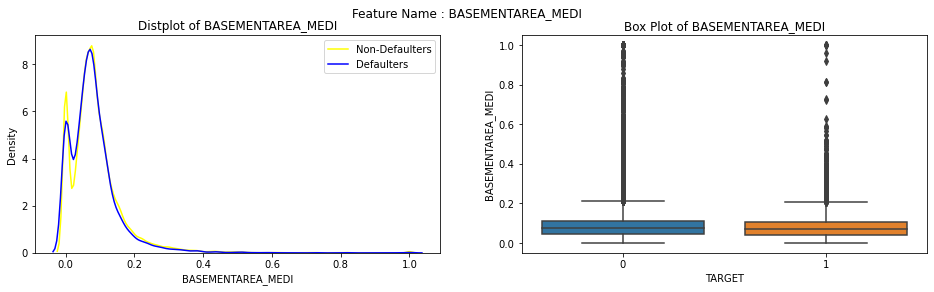

Number of null values in YEARS_BEGINEXPLUATATION_MEDI :  150007
Number of unique values in YEARS_BEGINEXPLUATATION_MEDI :  245
Stats
       Defaulter  Non_Defaulter
count   11017.00      146487.00
mean        0.98           0.98
std         0.07           0.06
min         0.00           0.00
25%         0.98           0.98
50%         0.98           0.98
75%         0.99           0.99
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


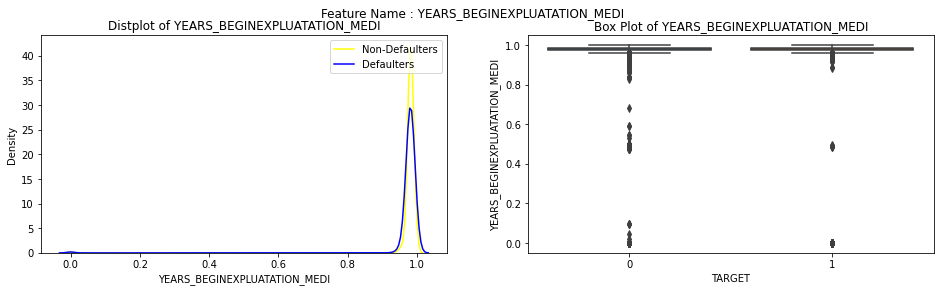

Number of null values in YEARS_BUILD_MEDI :  204488
Number of unique values in YEARS_BUILD_MEDI :  151
Stats
       Defaulter  Non_Defaulter
count    7074.00       95949.00
mean        0.75           0.76
std         0.11           0.11
min         0.00           0.00
25%         0.68           0.69
50%         0.75           0.76
75%         0.82           0.83
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


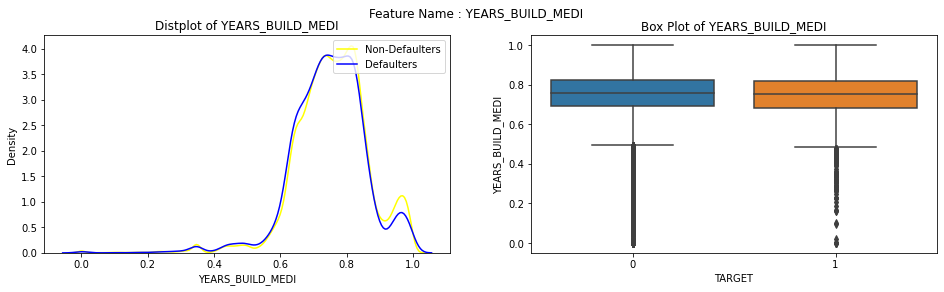

Number of null values in COMMONAREA_MEDI :  214865
Number of unique values in COMMONAREA_MEDI :  3202
Stats
       Defaulter  Non_Defaulter
count    6402.00       86244.00
mean        0.04           0.04
std         0.07           0.08
min         0.00           0.00
25%         0.01           0.01
50%         0.02           0.02
75%         0.05           0.05
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


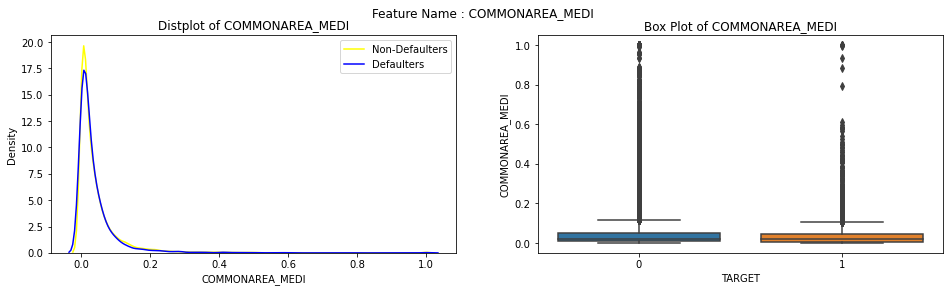

Number of null values in ELEVATORS_MEDI :  163891
Number of unique values in ELEVATORS_MEDI :  46
Stats
       Defaulter  Non_Defaulter
count    9910.00      133710.00
mean        0.06           0.08
std         0.12           0.14
min         0.00           0.00
25%         0.00           0.00
50%         0.00           0.00
75%         0.08           0.12
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


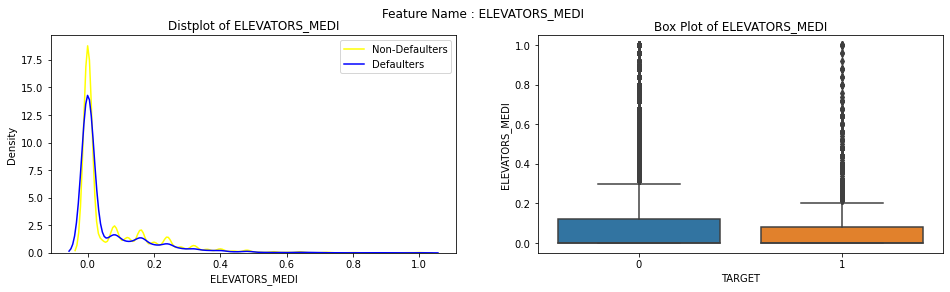

Number of null values in ENTRANCES_MEDI :  154828
Number of unique values in ENTRANCES_MEDI :  46
Stats
       Defaulter  Non_Defaulter
count   10614.00      142069.00
mean        0.14           0.15
std         0.10           0.10
min         0.00           0.00
25%         0.07           0.07
50%         0.14           0.14
75%         0.21           0.21
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


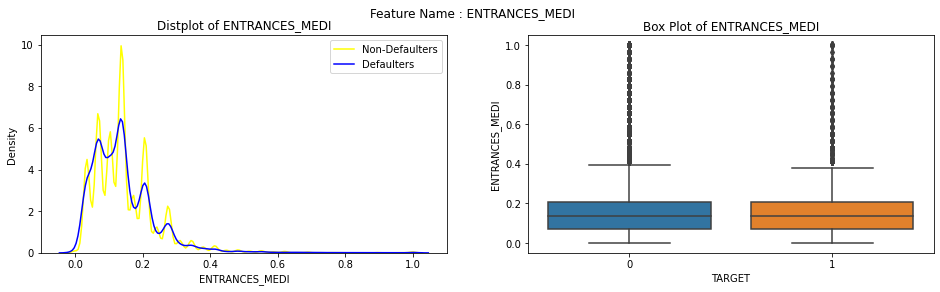

Number of null values in FLOORSMAX_MEDI :  153020
Number of unique values in FLOORSMAX_MEDI :  49
Stats
       Defaulter  Non_Defaulter
count   10761.00      143730.00
mean        0.20           0.23
std         0.13           0.15
min         0.00           0.00
25%         0.12           0.17
50%         0.17           0.17
75%         0.33           0.33
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


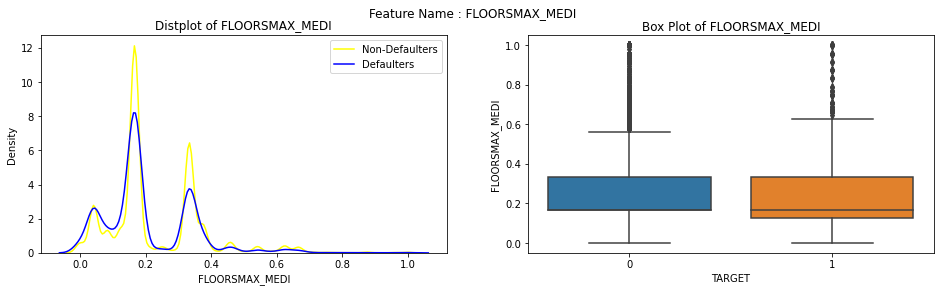

Number of null values in FLOORSMIN_MEDI :  208642
Number of unique values in FLOORSMIN_MEDI :  47
Stats
       Defaulter  Non_Defaulter
count    6817.00       92052.00
mean        0.21           0.23
std         0.15           0.16
min         0.00           0.00
25%         0.08           0.08
50%         0.21           0.21
75%         0.33           0.38
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


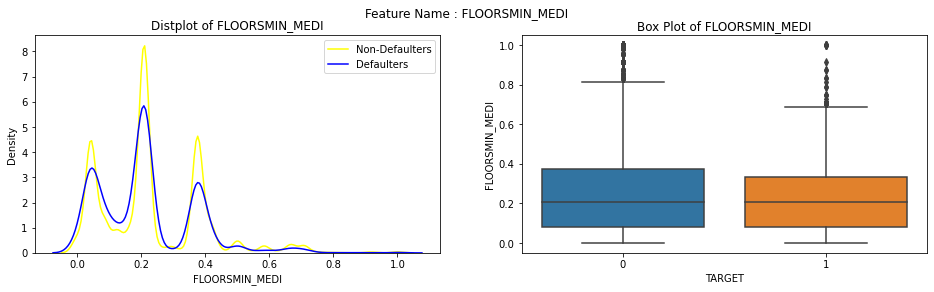

Number of null values in LANDAREA_MEDI :  182590
Number of unique values in LANDAREA_MEDI :  3560
Stats
       Defaulter  Non_Defaulter
count    8721.00      116200.00
mean        0.06           0.07
std         0.08           0.08
min         0.00           0.00
25%         0.02           0.02
50%         0.05           0.05
75%         0.08           0.09
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


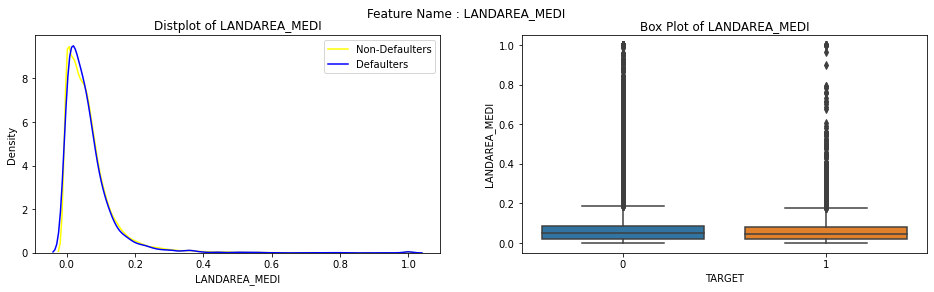

Number of null values in LIVINGAPARTMENTS_MEDI :  210199
Number of unique values in LIVINGAPARTMENTS_MEDI :  1097
Stats
       Defaulter  Non_Defaulter
count    6703.00       90609.00
mean        0.09           0.10
std         0.09           0.09
min         0.00           0.00
25%         0.05           0.05
50%         0.07           0.08
75%         0.12           0.12
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


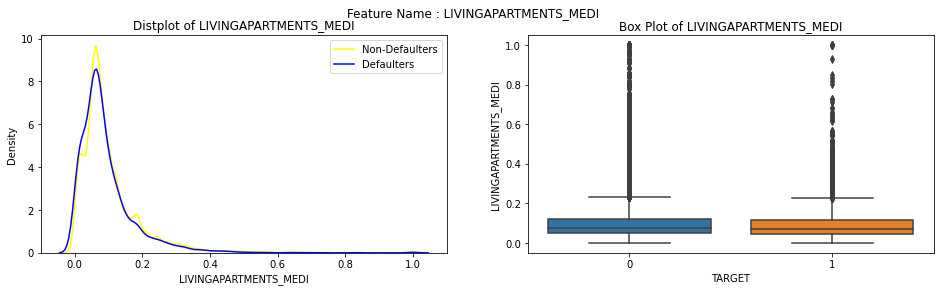

Number of null values in LIVINGAREA_MEDI :  154350
Number of unique values in LIVINGAREA_MEDI :  5281
Stats
       Defaulter  Non_Defaulter
count   10714.00      142447.00
mean        0.10           0.11
std         0.10           0.11
min         0.00           0.00
25%         0.04           0.05
50%         0.07           0.08
75%         0.12           0.13
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


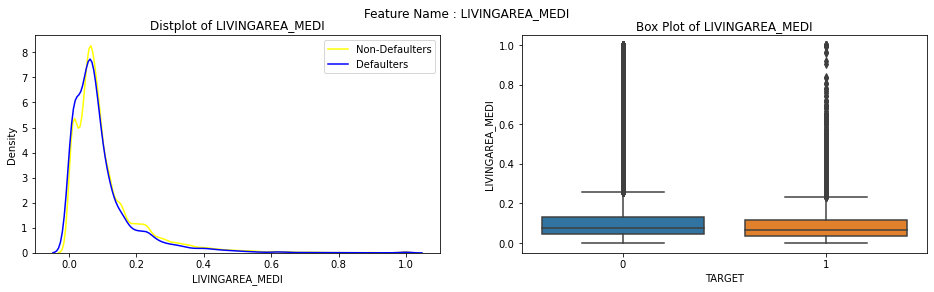

Number of null values in NONLIVINGAPARTMENTS_MEDI :  213514
Number of unique values in NONLIVINGAPARTMENTS_MEDI :  214
Stats
       Defaulter  Non_Defaulter
count    6498.00       87499.00
mean        0.01           0.01
std         0.05           0.05
min         0.00           0.00
25%         0.00           0.00
50%         0.00           0.00
75%         0.00           0.00
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


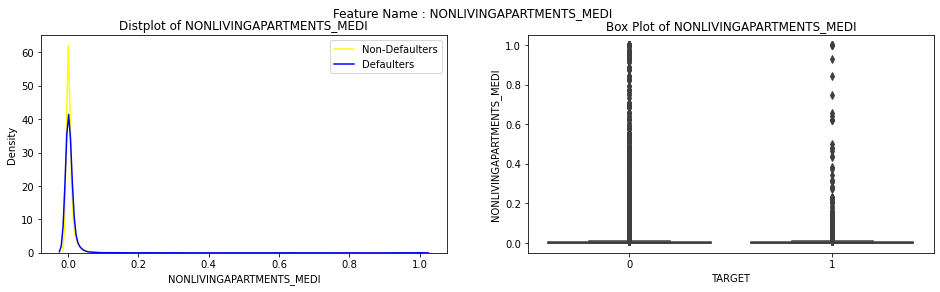

Number of null values in NONLIVINGAREA_MEDI :  169682
Number of unique values in NONLIVINGAREA_MEDI :  3323
Stats
       Defaulter  Non_Defaulter
count    9495.00      128334.00
mean        0.02           0.03
std         0.06           0.07
min         0.00           0.00
25%         0.00           0.00
50%         0.00           0.00
75%         0.02           0.03
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


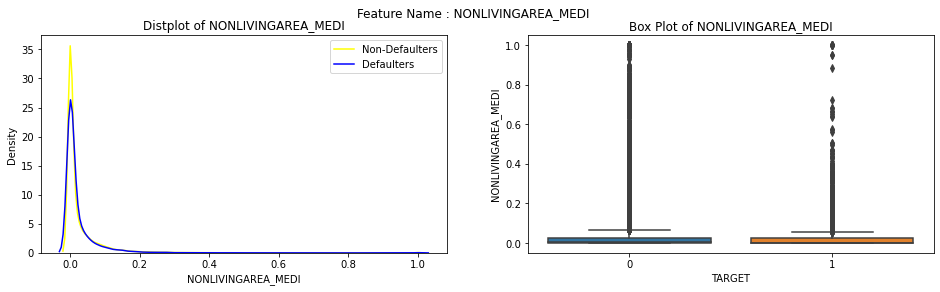

Number of null values in TOTALAREA_MODE :  148431
Number of unique values in TOTALAREA_MODE :  5116
Stats
       Defaulter  Non_Defaulter
count   11119.00      147961.00
mean        0.09           0.10
std         0.10           0.11
min         0.00           0.00
25%         0.03           0.04
50%         0.06           0.07
75%         0.11           0.13
max         1.00           1.00


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


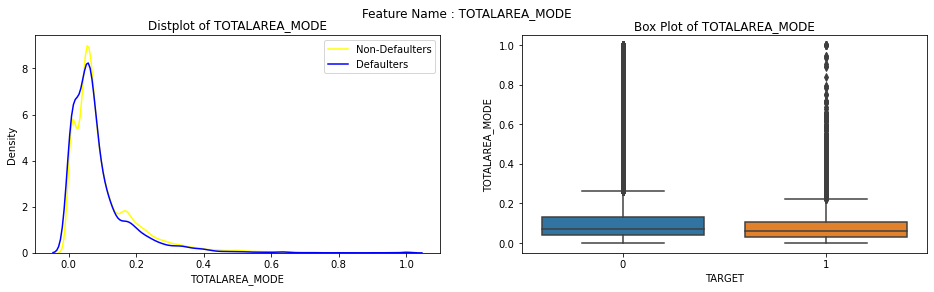

In [26]:
for col in building_cols:
    plot_numerical(application_train,col)

## EXTERNAL source columns.

Number of null values in EXT_SOURCE_1 :  173378
Number of unique values in EXT_SOURCE_1 :  114584
Stats
       Defaulter  Non_Defaulter
count   10054.00      124079.00
mean        0.39           0.51
std         0.20           0.21
min         0.01           0.01
25%         0.22           0.35
50%         0.36           0.52
75%         0.54           0.68
max         0.93           0.96


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


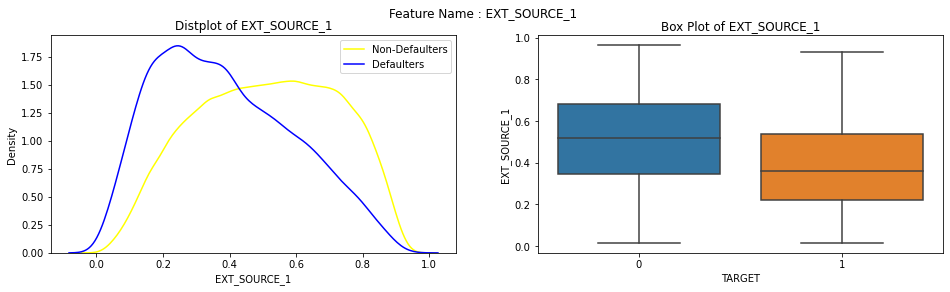

Number of null values in EXT_SOURCE_2 :  660
Number of unique values in EXT_SOURCE_2 :  119831
Stats
       Defaulter  Non_Defaulter
count   24773.00      282078.00
mean        0.41           0.52
std         0.21           0.19
min         0.00           0.00
25%         0.24           0.41
50%         0.44           0.57
75%         0.59           0.67
max         0.81           0.85


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


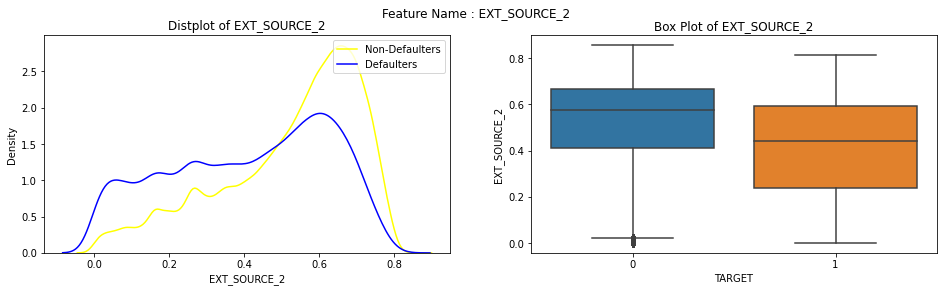

Number of null values in EXT_SOURCE_3 :  60965
Number of unique values in EXT_SOURCE_3 :  814
Stats
       Defaulter  Non_Defaulter
count   19148.00      227398.00
mean        0.39           0.52
std         0.21           0.19
min         0.00           0.00
25%         0.22           0.39
50%         0.38           0.55
75%         0.55           0.67
max         0.90           0.89


C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\girot\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


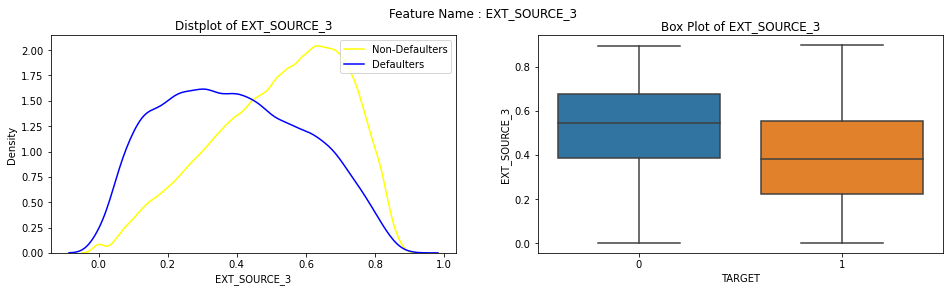

In [27]:
for col in ext_cols:
    plot_numerical(application_train,col,limits=find_outliers_IQR(application_train,col))

## Family columns.

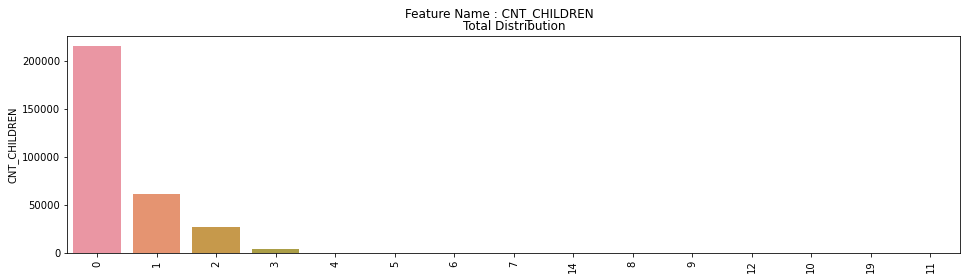

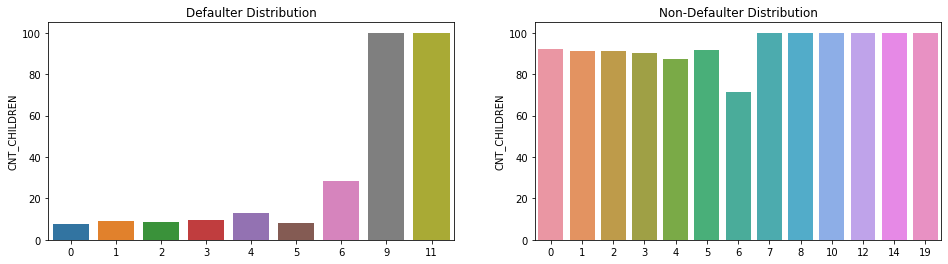



Number of null values :  0
----------------------------------------------------


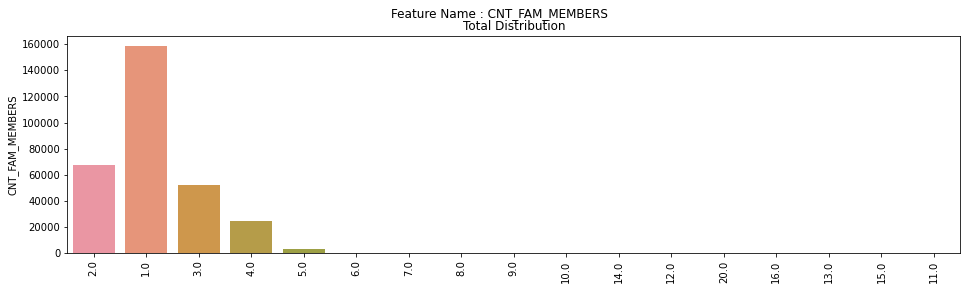

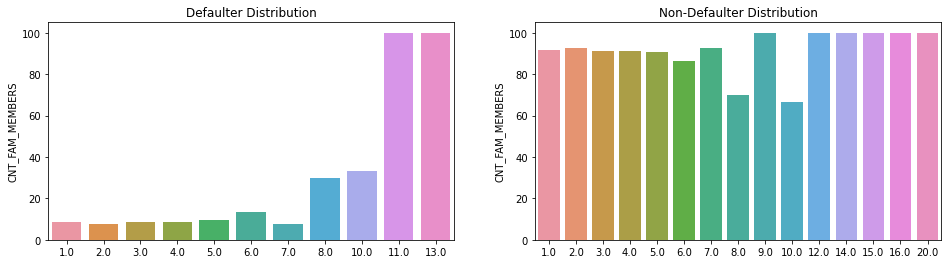



Number of null values :  2
----------------------------------------------------


In [28]:
for col in family_cols:
    plot_categorical(application_train,col)

# OBSERVATIONS

### OWN_CAR_AGE
1. Defaulters have older cars(>10 yrs).
2. We can make a column which denotes age band of car(>10 yrs or <10 yrs)

### AMT_INCOME_TOTAL
1. As expected, Income of Non Defaulters is greater than that of Defaulters.

### AMT_CREDIT
1. Loans taken by non Defaulters are slightly higher than those of Defaulters.

### AMT_ANNUITY

1. No clear distinction is there between defaulters and Non Defaulters for AMT_ANNUITY. Will need to do some feature engineering.
2. Since the variable is continuous with outliers we will fill null values with Median.

### AMT_GOODS_PRICE
1. Defaulters usually have less goods price.
2. Since the variable is continuous with outliers we will fill null values with Median. 

### AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR

1. Each of these columns has a lot of null values. We will fill these null values with their respective mode.

## DAYS Features

### DAYS_BIRTH 

1. Has negative values in days. Converting them to years will be more intuitive.
2. Defaulters are usually younger.

### DAYS_EMPLOYED

1. Has negative values in days. Converting them to years will be more intuitive.
2. Some values are too large (~1000 years). This seems wrong. Will need to handle these values.
4. Defaulters have lower duration of employment.

### DAYS_REGISTRATION
1. Has negative values in days. Converting them to years will be more intuitive.
2. defaulters have lower age of registration.

### DAYS_ID_PUBLISH
1. Defaulters have less DAYS_ID_PUBLISH.

### DAYS_LAST_PHONE_CHANGE
1. Defaulters change phone often.

## REGION Features

### REGION_POPULATION_RELATIVE 
1. Most people live in areas with less population density.
2. Defaulters live in slightly less populated areas.

### REGION_RATING_CLIENT ,REGION_RATING_CLIENT_W_CITY
1. Most people live in Tier 2 cities.
2. Tier 3 cities have highest rate of defaulting.

REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION have negligible data in the MINORITY category. These features will not add to the model and thus can be removed.

### REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY 
1. Minority class(1) has higher rate of defaulting.

## Flag Columns
1. 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_10','FLAG_DOCUMENT_12','FLAG_DOCUMENT_20' have negligible data in the MINORITY category. These features will not add to the model and thus can be removed.

## External_source Columns
1. They seem to be clearly differentiating between defaulters and non defaulters.
2. Will fill their null values using a model.
3. We can make a column with bands (greater than intersection point and less than intersection point of distributions of defaulter and non defaulters.)